ON September 1, 2022, this file was modified to include solar radiation (model version v11b)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec


chsize= 6
labelsize=8
annotation_txt_size = 7
abcd_size = 8
height_width_ratio = 2. / (1 + np.sqrt(5))

one_column_width = 3.5 # inches (this is from author guidelines)
two_column_width = 7.5 # inches (this is a guess)

volume = 'Data'
volume = 'My Passport for Mac'

# completely rebuilt weather time series on Feb 10 2022
version = 'v11'

version = 'v11b'


if version =='v11':
    lakecodelabel = 'lakecode'
    mergedversion = f'_{version}'
    extra = 'extra_'
    columns = ['lakecode','lat','lon','start_year','FDD_on','HDD_off',
                               'ice_on_doy','ice_off_doy','ice_duration',
                             'Lake_area','Shore_len','Shore_dev','Vol_total','Depth_avg',
                               'Dis_avg','Res_time','Elevation','Slope_100','TMINMAX_lagJJA','TMINMAX_lagSON', 
                             'TMINMAX_DJF','TMINMAX_MAM','PRCP_lagJJA','PRCP_lagSON','PRCP_DJF','PRCP_MAM',
                               'SNOW_lagJJA','SNOW_lagSON','SNOW_DJF','SNOW_MAM',
                              'SNWD_lagJJA','SNWD_lagSON','SNWD_DJF','SNWD_MAM']
elif version == 'v11b':
    lakecodelabel = 'lakecode'
    mergedversion = f'_{version}'
    extra = 'extra_'
    columns = ['lakecode','lat','lon','start_year','FDD_on','HDD_off',
                               'ice_on_doy','ice_off_doy','ice_duration',
                             'Lake_area','Shore_len','Shore_dev','Vol_total','Depth_avg',
                               'Dis_avg','Res_time','Elevation','Slope_100','TMINMAX_lagJJA','TMINMAX_lagSON', 
                             'TMINMAX_DJF','TMINMAX_MAM','PRCP_lagJJA','PRCP_lagSON','PRCP_DJF','PRCP_MAM',
                               'SNOW_lagJJA','SNOW_lagSON','SNOW_DJF','SNOW_MAM',
                              'SNWD_lagJJA','SNWD_lagSON','SNWD_DJF','SNWD_MAM','Rad_lagJJA','Rad_lagSON',
                              'Rad_DJF','Rad_MAM']
else:
    lakecodelabel = 'level_0'
    mergedversion = ''
    extra = ''
    columns = ['level_0','lat','lon','start_year','FDD_on','GDD_on','GDD_off','FDD_off',
                               'FDD_offseason','FDD_year','ice_on_doy','ice_off_doy','duration',
                             'Lake_area','Shore_len','Shore_dev','Vol_total','Depth_avg',
                               'Dis_avg','Res_time','Elevation','Slope_100','TMINMAX_lagSON','TMINMAX_lagJJA', 
                             'TMINMAX_DJF','TMINMAX_MAM']

In [2]:
df = pd.read_csv(f'/Volumes/{volume}/IceModels/top100_{extra}weather_all_deltaElev_100m.csv',low_memory=False)

df.DATE = pd.to_datetime(df.DATE)
df2 = pd.read_csv(f'/Volumes/{volume}/IceModels/model_input_{version}.csv',low_memory=False)

lakecode_dict = df2[[lakecodelabel,'lake']].drop_duplicates().set_index(lakecodelabel)['lake'].to_dict()

df2['Ice on date'] = df2[~df2.ice_on_doy.isnull()].apply(lambda x: pd.to_datetime(f"{int(x.start_year)}-12-31") + pd.to_timedelta(f"{x.ice_on_doy} days"), axis=1)
df2['Ice off date']= df2[~df2.ice_off_doy.isnull()].apply(lambda x: pd.to_datetime(f"{int(x.start_year)}-12-31") + pd.to_timedelta(f"{x.ice_off_doy} days"), axis=1)

df_ = df.merge(df2[['Ice on date',lakecodelabel]], left_on=['DATE','lakecode'], right_on=['Ice on date',lakecodelabel], how='left')
df_ = df_.merge(df2[['Ice off date',lakecodelabel]], left_on=['DATE','lakecode'], right_on=['Ice off date',lakecodelabel], how='left')
if lakecodelabel=='level_0':
    df_ = df_.drop([f'{lakecodelabel}_x',f'{lakecodelabel}_y'],axis=1)

    
# July 1 onwards
ind = df_.DATE.dt.month>=7
df_.loc[ind,'YEAR'] = df_.DATE.dt.year
df_.loc[~ind,'YEAR'] = df_.DATE.dt.year-1
df_['YEAR'] = df_['YEAR'].astype(int)

d1 = df_.copy()

d1['DOY'] = (d1.DATE - pd.to_datetime(d1.YEAR.astype(str)+'-12-31')).dt.days

df_data0 = d1.pivot_table(index=['lakecode','YEAR'],columns='DOY', values='TMINMAX')
df_data0 = df_data0.merge(df2[columns],
              left_index=True,right_on=[lakecodelabel,'start_year']).rename({lakecodelabel:'lakecode'},axis=1)


In [3]:
df2.start_year.unique()

array([1852., 1853., 1854., 1855., 1856., 1857., 1858., 1859., 1860.,
       1861., 1862., 1863., 1864., 1865., 1866., 1867., 1868., 1869.,
       1870., 1871., 1872., 1873., 1874., 1875., 1876., 1877., 1878.,
       1879., 1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887.,
       1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896.,
       1897., 1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905.,
       1906., 1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914.,
       1915., 1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923.,
       1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932.,
       1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941.,
       1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950.,
       1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979.,

Save merged data set.

In [29]:
df_data0.to_csv(f'/Volumes/{volume}/IceModels/merged_model_input{mergedversion}.csv',index=False)

In [4]:
#df_data0[df_data0.lakecode.isin(['xKB1341'])].drop_duplicates('lakecode').dropna(axis=1).values

In [4]:
#ind= ~df_data0[['ice_on_doy','Depth_avg','Lake_area']].isnull().any(axis=1)
#df_iceon = df_data0[ind]

#ind= ~df_data0[['ice_off_doy','Depth_avg','Lake_area']].isnull().any(axis=1)
#df_iceoff = df_data0[ind]


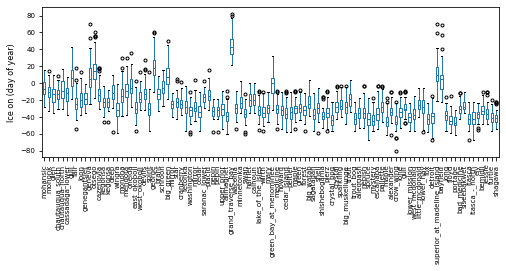

In [5]:
dfpivot = df_data0.pivot_table(index='start_year', columns='lakecode', values='ice_on_doy')

dfpivot_sort = df_data0.pivot_table(index='start_year', columns='lakecode', values='lat')
for c in dfpivot_sort.columns:
    if c not in dfpivot.columns:
        dfpivot[c] = np.nan

fig, ax = plt.subplots(1,1,figsize = (183./25.4, 183./25.4*0.5))

dfpivot[dfpivot_sort.mean().sort_values(ascending = True).index].boxplot(ax=ax,medianprops=dict(color='C0'),flierprops=dict(markersize=3))
ax.set_ylabel('Ice on (day of year)', fontsize = 8)
ax.tick_params(axis='x', labelrotation=90)
ax.tick_params(axis='both', labelsize = 7)
ax.xaxis.set_ticklabels([lakecode_dict[i.get_text()] for i in ax.xaxis.get_ticklabels()])
ax.grid(False)
fig.subplots_adjust(bottom = 0.3,left=0.1, right=0.98)
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_on_doy_box.pdf')
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_on_doy_box.png',dpi=300)

plt.show()

## Variation of ice on dates

In [6]:
dfpivot[['DMR1','JJM18']].loc[1979:2018,:].shape

#dfpivot.loc[:,'JJM18'].plot(marker='.')

(40, 2)

All lakes: 21.2 days
Mean per lake: 10.2
Minimum: siseebakwet 6.5
Maximum: geneva 17.2


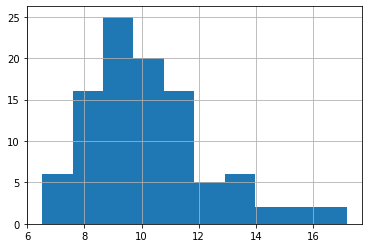

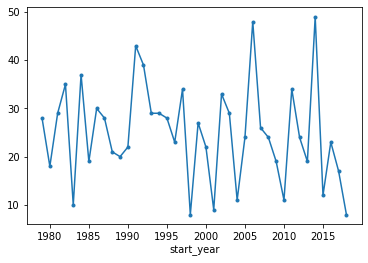

count    40.000000
mean     24.975000
std      10.286879
min       8.000000
25%      19.000000
50%      24.000000
75%      29.250000
max      49.000000
dtype: float64

8.95

43.249999999999986

In [7]:
dfpivot.std().hist()
print(f"All lakes: {dfpivot.stack().std():.1f} days\nMean per lake: {dfpivot.std().mean():.1f}")
print(f"Minimum: {lakecode_dict[dfpivot.std().idxmin()]} {dfpivot.std().min():.1f}")
print(f"Maximum: {lakecode_dict[dfpivot.std().idxmax()]} {dfpivot.std().max():.1f}")
select_years = (dfpivot.index <=2018) & (dfpivot.index>=1979)
dfcompare = dfpivot[select_years].rename(lakecode_dict,axis=1)[['wingra','mendota']]
plt.show()
((dfcompare['mendota'] - dfcompare['wingra']).dropna()).plot(marker='.')
plt.show()
display(((dfcompare['mendota'] - dfcompare['wingra']).dropna()).describe())

display(((dfcompare['mendota'] - dfcompare['wingra']).dropna()).quantile(0.05))
display(((dfcompare['mendota'] - dfcompare['wingra']).dropna()).quantile(0.95))






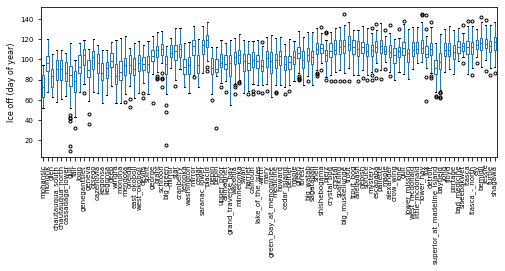

In [8]:
dfpivot = df_data0.pivot_table(index='start_year', columns='lakecode', values='ice_off_doy')

dfpivot_sort = df_data0.pivot_table(index='start_year', columns='lakecode', values='lat')

for c in dfpivot_sort.columns:
    if c not in dfpivot.columns:
        dfpivot[c] = np.nan

fig, ax = plt.subplots(1,1,figsize = (183./25.4, 183./25.4*0.5))

dfpivot[dfpivot_sort.mean().sort_values(ascending = True).index].boxplot(ax=ax,medianprops=dict(color='C0'),flierprops=dict(markersize=3))
ax.set_ylabel('Ice off (day of year)', fontsize = 8)
ax.tick_params(axis='x', labelrotation=90)
ax.tick_params(axis='both', labelsize = 7)
ax.xaxis.set_ticklabels([lakecode_dict[i.get_text()] for i in ax.xaxis.get_ticklabels()])
ax.grid(False)
fig.subplots_adjust(bottom = 0.3,left=0.1, right=0.98)
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_off_doy_box.pdf')
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_off_doy_box.png',dpi=300)

plt.show()

## Variation of ice off dates

All lakes: 14.5 days
Mean per lake:10.8
Minimum: maple 7.3 (JJM28)
Maximum: gull 18.5 (MICH03)


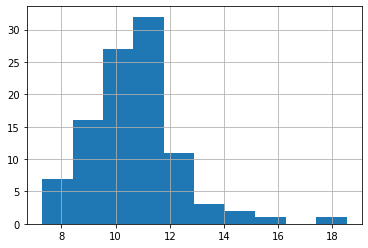

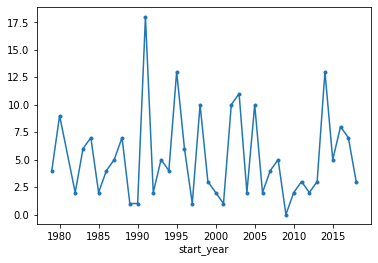

count    39.000000
mean      5.205128
std       4.059942
min       0.000000
25%       2.000000
50%       4.000000
75%       7.000000
max      18.000000
dtype: float64

1.0

13.0

In [9]:
dfpivot.std().hist()
print(f"All lakes: {dfpivot.stack().std():.1f} days\nMean per lake:{dfpivot.std().mean():.1f}")
print(f"Minimum: {lakecode_dict[dfpivot.std().idxmin()]} {dfpivot.std().min():.1f} ({dfpivot.std().idxmin()})")
print(f"Maximum: {lakecode_dict[dfpivot.std().idxmax()]} {dfpivot.std().max():.1f} ({dfpivot.std().idxmax()})")
select_years = (dfpivot.index <=2018) & (dfpivot.index>=1979)
dfcompare = dfpivot[select_years].rename(lakecode_dict,axis=1)[['wingra','mendota']]
plt.show()
((dfcompare['mendota'] - dfcompare['wingra']).dropna()).plot(marker='.')
plt.show()
display(((dfcompare['mendota'] - dfcompare['wingra']).dropna()).describe())

display(((dfcompare['mendota'] - dfcompare['wingra']).dropna()).quantile(0.05))
display(((dfcompare['mendota'] - dfcompare['wingra']).dropna()).quantile(0.95))




Look at all ice on and ice off time series by lake
- EXCLUDE MINN6 for ICE ON 

MINN6 gull


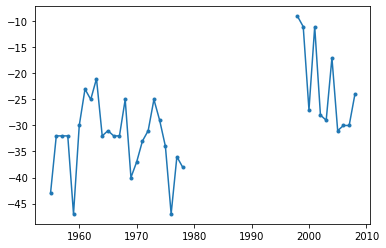

In [10]:
from IPython.display import clear_output
for name, group in df_data0.groupby('lakecode'):
    clear_output(wait=True)
    if name!='MINN6':
        continue
    print(name, lakecode_dict[name])
    #group.start_year = group.start_year
    plt.plot(group.set_index('start_year').ice_on_doy,marker='.')
    plt.plot(group.set_index('start_year').ice_on_doy.rolling(30,center=True).mean())
    plt.show()
    break
    input('continue')

MINN6 gull


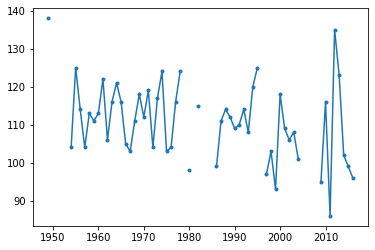

In [11]:
from IPython.display import clear_output
for name, group in df_data0.groupby('lakecode'):
    clear_output(wait=True)
    if name!='MINN6':
        continue
    print(name, lakecode_dict[name])
    #group.start_year = group.start_year
    plt.plot(group.set_index('start_year').ice_off_doy,marker='.')
    plt.plot(group.set_index('start_year').ice_off_doy.rolling(30,center=True).mean())
    plt.show()
    break
    #input('continue')

## Investigate distribution of lake parameters
- Depth_avg, Slope_100, Elevation, Shore_dev, Lake_area

In [12]:
#df_data0.columns.tolist()

In [13]:
dflakes = df_data0.drop_duplicates('lakecode')
dflakes= dflakes[~dflakes.Depth_avg.isnull()]

In [14]:
ind= ~df_data0[['ice_on_doy','Depth_avg','Lake_area']].isnull().any(axis=1) & ~df_data0.lakecode.isin(['MINN6'])

nyears = df_data0[ind].groupby(['lakecode']).ice_on_doy.count().min()
#df_data0[ind].drop_duplicates(['Lake_area','Depth_avg']).shape[0]

df_iceon_limited = df_data0[ind].sort_values(['lakecode','start_year'],ascending=True).groupby(['lakecode']).tail(nyears)
print('Number of years in ice on data:',nyears)
print('Number of lakes:', df_iceon_limited.lakecode.drop_duplicates().shape[0])
print('Number of rows:', df_iceon_limited.shape[0])

ind= ~df_data0[['ice_off_doy','Depth_avg','Lake_area']].isnull().any(axis=1) #& ~df_data0.lakecode.isin(['MINN6'])
nyears = df_data0[ind].groupby(['lakecode']).ice_off_doy.count().min()
#df_data0[ind].drop_duplicates(['Lake_area','Depth_avg']).shape[0]

df_iceoff_limited = df_data0[ind].sort_values(['lakecode','start_year'],ascending=True).groupby(['lakecode']).tail(nyears)

print('\nNumber of years in ice off data:', nyears)
print('Number of lakes:', df_iceoff_limited.lakecode.drop_duplicates().shape[0])
print('Number of rows:', df_iceoff_limited.shape[0])

df_all_seasons = df_iceon_limited.append(df_iceoff_limited).drop_duplicates(['lakecode','start_year'])


Number of years in ice on data: 31
Number of lakes: 73
Number of rows: 2263

Number of years in ice off data: 33
Number of lakes: 74
Number of rows: 2442


### Save ice phenology data for figshare publication

In [34]:
df2

,Unnamed: 0,lakecode,lake,start_year,ice_on_doy,ice_off_doy,ice_duration,lat,lon,TMINMAX_lagJJA,...,Tave_lagSON,Rad_lagSON,PPT_DJF,Tave_DJF,Rad_DJF,PPT_MAM,Tave_MAM,Rad_MAM,Ice on date,Ice off date
0,0,DMR1,mendota,1852.0,NaN,95.0,NaN,43.12800,-89.42000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1853-04-05
1,1,DMR1,mendota,1853.0,-4.0,NaN,NaN,43.12800,-89.42000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853-12-27,NaT
2,2,DMR1,mendota,1854.0,NaN,NaN,NaN,43.12800,-89.42000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,3,DMR1,mendota,1855.0,-13.0,105.0,118.0,43.12800,-89.42000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1855-12-18,1856-04-14
4,4,DMR1,mendota,1856.0,-25.0,126.0,151.0,43.12800,-89.42000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1856-12-06,1857-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999,7999,xKB1987,wirth,2012.0,NaN,117.0,NaN,44.98177,-93.32369,23.800000,...,8.533333,NaN,84.0,-7.866667,NaN,316.0,4.100000,NaN,NaT,2013-04-27
8000,8000,xKB1987,wirth,2013.0,NaN,NaN,NaN,44.98177,-93.32369,22.716848,...,8.900000,NaN,106.0,-13.566667,NaN,372.0,4.766667,NaN,NaT,NaT
8001,8001,xKB1987,wirth,2014.0,NaN,86.0,NaN,44.98177,-93.32369,21.921196,...,7.066667,NaN,55.0,-8.400000,NaN,244.0,7.833333,NaN,NaT,2015-03-27
8002,8002,xKB1987,wirth,2015.0,NaN,76.0,NaN,44.98177,-93.32369,21.816848,...,11.366667,NaN,112.0,-5.300000,NaN,281.0,9.000000,NaN,NaT,2016-03-16


In [38]:
iceon = df_iceon_limited[['lakecode','start_year']].merge(df2,left_on=['lakecode','start_year'],
                                                  right_on=['lakecode','start_year'],
                                                  how='left')[['lake','lat','lon','Ice on date']]
iceoff = df_iceoff_limited[['lakecode','start_year']].merge(df2,left_on=['lakecode','start_year'],
                                                  right_on=['lakecode','start_year'],
                                                  how='left')[['lake','lat','lon','Ice off date']]

iceon['lat'] = iceon['lat'].round(5)
iceon['lon'] = iceon['lon'].round(5)
iceoff['lat'] = iceoff['lat'].round(5)
iceoff['lon'] = iceoff['lon'].round(5)

iceon.to_csv('icephenology_iceon.csv',index=False)
iceoff.to_csv('icephenology_iceoff.csv',index=False)




In [39]:
iceon.shape, iceoff.shape

((2263, 4), (2442, 4))

In [97]:
display(df_iceon_limited.groupby('lakecode').FDD_on.mean().describe())
df_iceoff_limited.groupby('lakecode').HDD_off.mean().describe()

count     73.000000
mean      91.246598
std       54.392908
min       27.945161
25%       52.898333
50%       81.037097
75%      113.593548
max      301.861290
Name: FDD_on, dtype: float64

count     74.000000
mean     133.466472
std       27.324688
min       69.854545
25%      114.300785
50%      129.976358
75%      147.207481
max      222.073810
Name: HDD_off, dtype: float64

### Ice on DOY and ice off DOY correlation plots

In [98]:
from scipy.stats import pearsonr

In [99]:
#x = X[c]
#ind = x.isnull() | y.isnull()
#pearsonr(x[~ind],y[~ind])

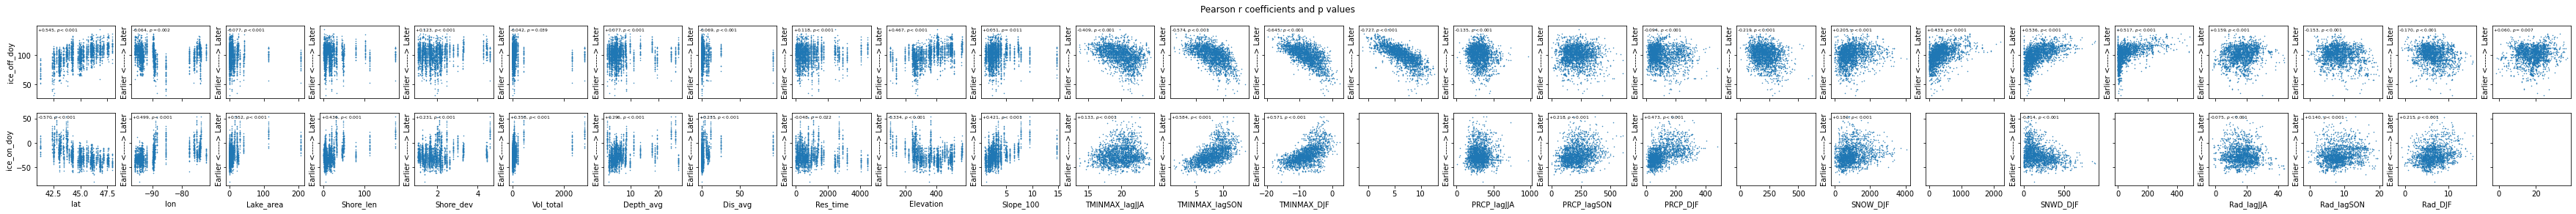

In [151]:
fig,axes = plt.subplots(2,27, sharey = 'row',sharex = 'col', figsize = [50,4])

all_extra = ['SNOW_lagJJA','SNWD_lagJJA','SNOW_lagSON','SNWD_lagSON']
dfcorr_p = pd.DataFrame(columns = ['ice_on_doy','ice_on_doy_pval','ice_off_doy','ice_off_doy_pval'])
for ii,i in enumerate(['ice_off_doy','ice_on_doy']):
    if i == 'ice_on_doy':
        df_ = df_iceon_limited.copy()
        extra = [c for c in df_iceon_limited.loc[:,'lat':].columns if (('MAM' in c))]# | ('SNWD' in c) | ('SNOW' in c))]
    else:
        df_ = df_iceoff_limited.copy()
        extra = []
    y = df_.loc[:,i]
    X = df_.loc[:,'lat':].drop(['start_year','FDD_on','HDD_off','ice_on_doy','ice_off_doy','ice_duration']+all_extra,axis=1)
    iii = 0
    for c in X.columns:
        ax = axes[ii,iii]
        if c not in extra:
            x = X[c]
            ind = x.isnull() | y.isnull()
            r, pval = pearsonr(x[~ind],y[~ind])
            dfcorr_p.loc[c,i] = r
            dfcorr_p.loc[c,f"{i}_pval"] = pval
            ax.plot(X[c],y,marker='.',markersize=1,ls='none')
            if pval < 0.05:
                if pval < 0.001:
                    pvaltext = '$p<0.001$'
                else:
                    pvaltext = f'$p={pval:.3f}$'
                ax.text(0.01,0.99,f"{r:+.3f}, {pvaltext}", ha='left',va='top',fontsize=6,transform=ax.transAxes)
            if ii==1:
                ax.set_xlabel(c)
            if iii == 0:
                ax.set_ylabel(i)
            else:
                ax.set_ylabel('Earlier <-----> Later')
        iii = iii + 1
fig.suptitle('Pearson r coefficients and p values')
fig.subplots_adjust(left = 0.03,right=0.99)

fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/correlations.pdf')

In [123]:
dfcorr_p.astype(float).round(3).to_csv('/Users/blagrave/Projects/IcePhenologyModels/Figures/correlations.csv')

In [158]:
dfcorr_p.astype(float).round(3).reindex(dfcorr_p.ice_off_doy.abs().sort_values(ascending=False).index)

,ice_on_doy,ice_on_doy_pval,ice_off_doy,ice_off_doy_pval
TMINMAX_MAM,NaN,NaN,-0.727,0.000
TMINMAX_DJF,0.571,0.000,-0.645,0.000
TMINMAX_lagSON,0.584,0.000,-0.574,0.000
lat,-0.570,0.000,0.545,0.000
SNWD_DJF,-0.314,0.000,0.536,0.000
SNWD_MAM,NaN,NaN,0.517,0.000
Elevation,-0.334,0.000,0.467,0.000
SNOW_MAM,NaN,NaN,0.433,0.000
TMINMAX_lagJJA,0.133,0.000,-0.409,0.000
PRCP_MAM,NaN,NaN,-0.219,0.000


Meteorological variables correlations

In [133]:

meteo_columns = [c for c in df_iceon_limited.loc[:,'lat':].columns if (('JJA' in c) | ('SON' in c) | ('DJF' in c) | ('MAM' in c))]

print(meteo_columns)
#fig,axes = plt.subplots(len(meteo_columns),len(meteo_columns), sharey = 'row',sharex = 'col', figsize = [50,50])


#all_extra = ['SNOW_lagJJA','SNWD_lagJJA','SNOW_lagSON','SNWD_lagSON']
all_extra = []
dfcorr_p = pd.DataFrame()
#dfcorr_p = pd.DataFrame(columns = ['ice_on_doy','ice_on_doy_pval','ice_off_doy','ice_off_doy_pval'])
for ii,i in enumerate(meteo_columns):
    #if i == 'ice_on_doy':
    df_ = df_iceon_limited.append(df_iceoff_limited,ignore_index=True).copy()
    extra = [] #[c for c in df_iceon_limited.loc[:,'lat':].columns if (('MAM' in c))]# | ('SNWD' in c) | ('SNOW' in c))]
    #else:
    #    df_ = df_iceoff_limited.copy()
    #    extra = []
        
    y = df_.loc[:,i]
    X = df_.loc[:,meteo_columns] #'lat':].drop(['start_year','FDD_on','HDD_off','ice_on_doy','ice_off_doy','ice_duration']+all_extra,axis=1)
    
    iii = 0
    for c in X.columns:
        #ax = axes[ii,iii]
        if c not in extra:
            x = X[c]
            ind = x.isnull() | y.isnull()
            r, pval = pearsonr(x[~ind],y[~ind])
            dfcorr_p.loc[c,i] = r
            dfcorr_p.loc[c,f"{i}_pval"] = pval
            #ax.plot(X[c],y,marker='.',markersize=1,ls='none')
            if pval < 0.05:
                if pval < 0.001:
                    pvaltext = '$p<0.001$'
                else:
                    pvaltext = f'$p={pval:.3f}$'
                #ax.text(0.01,0.99,f"{r:+.3f}, {pvaltext}", ha='left',va='top',fontsize=6,transform=ax.transAxes)
            #if ii==1:
            #    ax.set_xlabel(c)
            #if iii == 0:
            #    ax.set_ylabel(i)
            #else:
            #    ax.set_ylabel('Earlier <-----> Later')
        iii = iii + 1
#fig.suptitle('Pearson r coefficients and p values')
#fig.subplots_adjust(left = 0.03,right=0.99)

#fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/correlations2.pdf')
dfcorr_p.astype(float).round(3).to_csv('/Users/blagrave/Projects/IcePhenologyModels/Figures/correlations2.csv')

['TMINMAX_lagJJA', 'TMINMAX_lagSON', 'TMINMAX_DJF', 'TMINMAX_MAM', 'PRCP_lagJJA', 'PRCP_lagSON', 'PRCP_DJF', 'PRCP_MAM', 'SNOW_lagJJA', 'SNOW_lagSON', 'SNOW_DJF', 'SNOW_MAM', 'SNWD_lagJJA', 'SNWD_lagSON', 'SNWD_DJF', 'SNWD_MAM', 'Rad_lagJJA', 'Rad_lagSON', 'Rad_DJF', 'Rad_MAM']


/Users/blagrave/.virtualenvs/icemodels/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [150]:
rval = dfcorr_p.astype(float).round(3).iloc[:,::2].stack()
pval = dfcorr_p.astype(float).round(3).iloc[:,1::2].rename({c:c.replace('_pval','') for c in dfcorr_p.iloc[:,1::2]},axis=1).stack()

rval.to_frame().rename({0:'Pearson r'},axis=1).merge(pval.to_frame().rename({0:'p value'},axis=1),left_index=True,
                                              right_index=True,how='outer').to_csv('/Users/blagrave/Projects/IcePhenologyModels/Figures/correlations2_stacked.csv')

,TMINMAX_lagJJA,TMINMAX_lagSON,TMINMAX_DJF,TMINMAX_MAM,PRCP_lagJJA,PRCP_lagSON,PRCP_DJF,PRCP_MAM,SNOW_lagJJA,SNOW_lagSON,SNOW_DJF,SNOW_MAM,SNWD_lagJJA,SNWD_lagSON,SNWD_DJF,SNWD_MAM,Rad_lagJJA,Rad_lagSON,Rad_DJF,Rad_MAM
0,22.866848,8.613187,-6.108333,6.114130,226.0,230.5,60.9,146.6,0.0,89.0,350.0,211.0,0.0,1.384615,29.911111,21.260870,29.866667,7.566667,12.466667,21.500000
1,20.617391,8.691209,-6.022778,7.903804,260.9,136.8,64.6,276.4,0.0,88.0,535.0,0.0,0.0,1.659341,30.122222,0.000000,18.433333,14.300000,7.400000,14.466667
2,20.576630,10.105495,-6.951667,9.584783,376.1,174.8,89.0,223.1,0.0,63.0,643.0,16.0,0.0,0.549451,100.366667,0.000000,5.766667,10.566667,7.633333,3.933333
3,21.475543,7.725275,-3.575275,7.148913,301.5,355.3,86.0,168.7,0.0,178.0,515.0,127.0,0.0,5.857143,21.417582,2.206522,20.833333,6.800000,5.200000,19.666667
4,18.493478,7.962637,-6.510000,6.450000,174.3,398.4,143.3,366.3,0.0,203.0,725.0,521.0,0.0,6.000000,65.744444,22.065217,20.466667,9.866667,5.200000,10.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,23.478804,8.577473,-6.116111,9.965761,279.5,96.1,97.0,171.7,0.0,6.0,569.0,328.0,0.0,0.000000,42.100000,32.010870,20.766667,3.933333,1.900000,18.866667
4701,23.101087,10.689011,-9.452747,6.043478,372.4,248.2,51.9,194.0,0.0,10.0,635.0,498.0,0.0,0.000000,125.087912,16.836957,25.533333,8.066667,8.266667,25.433333
4702,23.800000,9.707692,-6.786667,5.664674,250.9,56.8,97.4,342.8,0.0,21.0,884.0,819.0,0.0,0.274725,76.100000,63.717391,NaN,NaN,NaN,NaN
4703,21.921196,7.691209,-7.488333,8.972283,420.3,90.1,39.8,168.8,0.0,240.0,406.0,181.0,0.0,15.054945,41.444444,3.586957,NaN,NaN,NaN,NaN


## Contributors

In [21]:
df_contributors= pd.read_csv('/Users/blagrave/Projects/IcePhenology/all_lakes_ts_reduced.csv',low_memory=False)
df_contributors[df_contributors.lakecode.isin(df_iceoff_limited.lakecode.unique().tolist())].drop_duplicates('contributor')#.contributor

,lakecode,lake,start_year,froze,froze_1,froze_2,froze_3,froze_4,froze_5,froze_6,...,source,contributor,latitude,longitude,other_lakenames,filename,ice_on,ice_on_doy,ice_off,ice_off_doy
1252,DMR1,mendota,1852,Y,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,Dale Robertson,43.12800,-89.42000,Mendota,../data/Updated Data 2019.5/Dale Robertson/Ice...,NaN,NaN,1853-04-05,95.0
1254,DMR1,mendota,1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43.12800,-89.42000,Mendota,NaN,NaN,NaN,NaN,NaN
1419,DMR1,mendota,2019,Y,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,WSCO,43.12800,-89.42000,Mendota,../data/Updated Data 2021/WSCO/madison_lakes.csv,2020-01-12,12.0,2020-03-22,82.0
1421,DMR2,monona,1851,Y,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,LTER,43.06700,-89.36600,Monona,../data/Updated Data 2019.5/LTER/ntl-lter_2019...,1851-12-13,-18.0,1852-03-25,85.0
8216,HB01,mirror,1968,Y,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,LIAG (LIKENS),43.94400,-71.69300,MIRROR LAKE,../data/Updated Data/LIAG/liag_freeze_thaw_tab...,1968-11-26,-35.0,1969-04-25,115.0
8309,JD01,kegonsa,1902,Y,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,LIAG (DANIELSON),42.96600,-89.25100,LAKE KEGONSA,../data/Updated Data/LIAG/liag_freeze_thaw_tab...,NaN,NaN,1903-03-20,79.0
8414,JGL01,spirit,1943,Y,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,LIAG (LARSCHEID),43.47700,-95.10200,SPIRIT LAKE,../data/Updated Data/LIAG/liag_freeze_thaw_tab...,NaN,NaN,1944-04-16,107.0
8666,JJM1,allequash,1982,Y,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,LIAG (MAGNUSON),46.03700,-89.62000,Allequash;ALLEQUASH LAKE,../data/Updated Data/LIAG/liag_freeze_thaw_tab...,1982-11-19,-42.0,1983-04-27,117.0
8882,JJM15,escanaba,1955,Y,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,Greg Sass,46.06400,-89.58700,LAKE ESCANABA;Escanaba,../data/Updated Data 2022/Greg Sass/NHFRA_IceR...,1955-11-15,-46.0,1956-04-30,121.0
9141,JJM18,wingra,1968,Y,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,Sapna Sharma,43.05400,-89.41900,Wingra,../data/Updated Data 2021/Sapna Sharma/BigGree...,1968-12-07,-24.0,1969-04-09,99.0


In [22]:
iceon_features = ['TMINMAX_lagSON','Slope_100','TMINMAX_DJF','Lake_area',
       'TMINMAX_lagJJA', 'Depth_avg','Elevation']
iceoff_features = ['TMINMAX_MAM','TMINMAX_DJF','TMINMAX_lagJJA','TMINMAX_lagSON',
                   'Elevation','Shore_dev','Slope_100']

In [23]:
df_data0.lakecode.unique().shape
import matplotlib as mpl


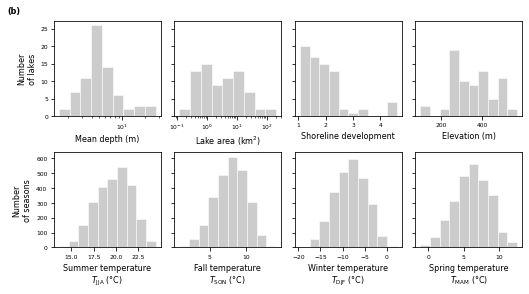

In [24]:
cleaned_labels = {'Shore_len':'Shoreline length (km)',
                      'Depth_avg':'Mean depth (m)', 
                      'Lake_area': 'Lake area (km$^2$)',
                      'Elevation': 'Elevation (m)',
                      'Slope_100': 'Slope within 100 m (\N{DEGREE SIGN})',
                     'Shore_dev': 'Shoreline development',
                     'TMINMAX_lagSON' : 'Fall temperature\n$T_\mathrm{SON}$ (\N{DEGREE SIGN}C)',
                      'TMINMAX_lagJJA': 'Summer temperature\n$T_\mathrm{JJA}$ (\N{DEGREE SIGN}C)',
                      'TMINMAX_DJF': 'Winter temperature\n$T_\mathrm{DJF}$ (\N{DEGREE SIGN}C)',
                     'TMINMAX_MAM': 'Spring temperature\n$T_\mathrm{MAM}$ (\N{DEGREE SIGN}C)'}

nrows,ncols = 2,5
offset = 1

nrows,ncols = 2,4
offset = 0

top_margin = 0.4
bottom_margin = 0.5
left_margin = 0.8
right_margin = 0.2
w_gap = 0.4
h_gap = 0.5
fig_width = two_column_width # inches
plot_width = (fig_width - left_margin - right_margin - (w_gap)*(ncols-1))/ncols
plot_height = plot_width
fig_height = bottom_margin + top_margin + plot_height*(nrows) + h_gap*(nrows-1)


#fig,axes =plt.subplots(nrows, ncols, figsize = (fig_width, fig_height), sharey='row')

fig = plt.figure(figsize=(fig_width,fig_height))

spec = gridspec.GridSpec(ncols=ncols*2,nrows=nrows, figure=fig, height_ratios=[1,1])

axes = []

for i in range(ncols):
    if i!=0:
        axes.append(fig.add_subplot(spec[0,i*2:i*2+2], sharey=axes[0]))
        axes[i].tick_params(labelleft=False)
    else:
        axes.append(fig.add_subplot(spec[0,i*2:i*2+2]))
for i in range(ncols-offset):
    if i!=0:
        axes.append(fig.add_subplot(spec[1,i*2+offset:i*2+2+offset],sharey=axes[ncols]))
        axes[ncols+i].tick_params(labelleft=False)
    else:
        axes.append(fig.add_subplot(spec[1,i*2+offset:i*2+2+offset]))
        
if offset == 1:
    axes.append(fig.add_subplot(spec[1,-1]))

axes = np.array(axes).reshape(nrows,ncols)
    
features = ['Depth_avg','Lake_area',#'Slope_100',
            'Shore_dev','Elevation',
    'TMINMAX_lagJJA', 'TMINMAX_lagSON', 'TMINMAX_DJF', 'TMINMAX_MAM']
#pd.plotting.hist_frame(df_data0.loc[~df_data0.Depth_avg.isnull(),features],alpha=1.0,ax=axes.flatten()[:9])

for i,ax in enumerate(axes.flatten()):
    if (i==9) & (offset==1):
        ax.set_visible(False)
        continue
    if features[i] in ['TMINMAX_lagJJA', 'TMINMAX_lagSON', 'TMINMAX_DJF', 'TMINMAX_MAM']:
        values = df_all_seasons.loc[~df_all_seasons.Depth_avg.isnull(),features[i]]
    else:
        values = df_all_seasons.loc[~df_all_seasons.Depth_avg.isnull(),:].drop_duplicates('lakecode')[features[i]]
    #print(len(values))
    bins = None
    pad = 4
    tickpad = 3
    if features[i] in ['Lake_area','Depth_avg']:
        ax.set_xscale('log')
        bins = np.logspace(np.log10(values.min()),np.log10(values.max()),10)
        pad = 3.2
        tickpad=2.2
    ax.set_xlabel(cleaned_labels[features[i]],fontsize=labelsize,labelpad=pad)
    ax.tick_params(which='both',axis='both',labelsize=chsize,pad=tickpad)
    ax.grid(False)
    ax.hist(values, bins=bins,edgecolor='1.0',color='0.8',lw=0.5)
    if i==0:
        ax.set_ylabel('Number\nof lakes',fontsize=labelsize)
    elif ((i==5) & (offset==1)) | ((i==4) & (offset == 0)):
        ax.set_ylabel('Number\nof seasons',fontsize=labelsize)
    
ax.text(0.02,0.95,'(b)',ha='left',va='top',
        transform=fig.transFigure,weight='bold',fontsize=abcd_size)
    
fig.subplots_adjust(wspace=w_gap/plot_width,left=left_margin/fig_width, 
                    right=1 - right_margin/fig_width,
                        top=1 - top_margin/fig_height,bottom=bottom_margin/fig_height, hspace = h_gap / plot_height)
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/model_inputs_histograms.pdf')
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/model_inputs_histograms.png',dpi=300)

In [21]:
df_data0.loc[~df_data0.Depth_avg.isnull(),features].describe().T.to_csv(
    f'/Users/blagrave/Projects/IcePhenologyModels/Data/model_inputs_statistics{mergedversion}.csv')

## Antecedent conditions

In [25]:
#df_all_seasons
from IPython.display import clear_output
iceon_antecedent = df_data0.copy()
iceoff_antecedent = df_data0.copy()

for ii in range(-183,182):
    ind1 = df_data0.ice_on_doy == -ii
    ind2 = df_data0.ice_off_doy == -ii
    if (ind1.sum()==0) & (ind2.sum()==0):
        continue        
    clear_output(wait=True)
    print(ii)
    df_shift = df_data0.loc[:,-183:182].shift(ii,axis=1)
    #display(df_shift)
    iceon_antecedent.loc[ind1,-183:182] = df_shift[ind1]
    iceoff_antecedent.loc[ind2,-183:182] = df_shift[ind2]    

80


In [26]:
ind_keep_on = ~iceon_antecedent.loc[:,-30:0].isnull().any(axis=1)
ind_keep_off = ~iceoff_antecedent.loc[:,-30:0].isnull().any(axis=1)

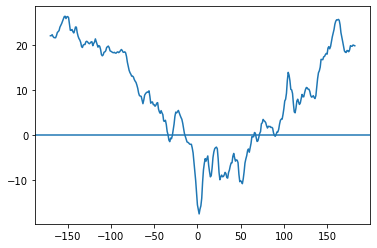

In [27]:
iceon_antecedent.loc[:,-183:182].loc[18,:].rolling(7).mean().plot()
plt.axhline(0)

In [28]:
from numpy.polynomial import Chebyshev


In [29]:
df_iceon_limited

,-183,-182,-181,-180,-179,-178,-177,-176,-175,-174,...,SNOW_DJF,SNOW_MAM,SNWD_lagJJA,SNWD_lagSON,SNWD_DJF,SNWD_MAM,Rad_lagJJA,Rad_lagSON,Rad_DJF,Rad_MAM
136,15.30,16.70,19.70,22.50,24.20,27.50,28.90,29.70,26.40,26.90,...,350.0,211.0,0.0,1.384615,29.911111,21.260870,29.866667,7.566667,12.466667,21.500000
137,22.80,23.90,24.45,24.75,23.30,23.90,27.20,22.80,23.05,29.70,...,535.0,0.0,0.0,1.659341,30.122222,0.000000,18.433333,14.300000,7.400000,14.466667
138,22.80,20.00,21.35,28.05,26.35,20.00,17.50,20.25,25.00,22.50,...,643.0,16.0,0.0,0.549451,100.366667,0.000000,5.766667,10.566667,7.633333,3.933333
139,19.70,22.80,23.90,21.70,20.85,23.60,24.45,22.50,20.00,23.05,...,515.0,127.0,0.0,5.857143,21.417582,2.206522,20.833333,6.800000,5.200000,19.666667
140,19.70,25.00,19.45,17.50,17.20,16.65,20.00,20.80,23.60,21.95,...,725.0,521.0,0.0,6.000000,65.744444,22.065217,20.466667,9.866667,5.200000,10.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,24.75,25.00,23.30,23.05,19.75,15.55,16.40,18.35,22.25,22.50,...,471.0,169.0,0.0,0.274725,34.355556,6.076087,11.533333,6.866667,5.233333,17.333333
7992,20.00,20.80,22.75,22.80,19.45,20.25,23.35,24.75,27.50,28.35,...,483.0,517.0,0.0,1.945055,49.855556,27.891304,17.900000,9.233333,7.766667,18.133333
7993,26.65,26.40,26.10,21.65,21.95,23.05,25.00,27.25,24.45,22.25,...,569.0,328.0,0.0,0.000000,42.100000,32.010870,20.766667,3.933333,1.900000,18.866667
7994,23.05,22.75,25.25,25.80,25.00,25.00,27.80,27.50,24.15,20.85,...,635.0,498.0,0.0,0.000000,125.087912,16.836957,25.533333,8.066667,8.266667,25.433333


In [30]:
df_zero = pd.DataFrame()
for ii in iceon_antecedent.index:
    clear_output(wait=True)
    print(ii)
    
    y = iceon_antecedent.loc[:,-183:182].cumsum(axis=1).loc[ii,:]

    ind = ~y.isnull()
    y=y[ind]

    x = y.index.astype(float)
    y = y.values

    #plt.plot(x,y)

    c = Chebyshev.fit(x, y, deg=13)
    newx = np.linspace(x[0],x[-1],1000)
    newy = c(newx)
    #iceon_antecedent.loc[:,-183:182].cumsum(axis=1).loc[16:18,:].T.plot()
    #plt.axvline(0,color='k')
    #plt.plot(newx,newy,color='red',lw=10,alpha=0.5)
    try:
        smoothzero = newx[np.argmax(newy[newx < 0])]
        zerocross = x[np.argmax(y[x<0])]
    except:
        smoothzero = np.nan
        zerocross = np.nan
    df_zero.loc[ii, 'Zero-crossing'] = zerocross
    df_zero.loc[ii,'Smoothed zero-crossing'] = smoothzero
    #plt.show()
    #input('continue?')
    

8003


In [31]:
iceoff_from_iceon = iceoff_antecedent[~iceoff_antecedent.ice_duration.isnull()].apply(lambda x: x[np.max([-183,-x.ice_duration]):0].cumsum(),axis=1)

In [32]:
iceoff_from_iceon

,-183,-182,-181,-180,-179,-178,-177,-176,-175,-174,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-444.45,-439.15,-433.90,-432.55,-430.90,-430.10,-430.90,-427.00,-417.55,-412.00
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-675.40,-670.40,-663.20,-654.85,-646.00,-637.65,-627.10,-616.80,-606.80,-592.95
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-394.05,-389.35,-386.00,-385.45,-381.85,-376.25,-371.80,-369.05,-364.35,-353.80
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-728.45,-728.45,-727.05,-721.75,-714.50,-704.50,-691.70,-689.20,-685.85,-672.00
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1016.40,-1011.40,-1007.50,-1003.90,-998.10,-992.25,-986.70,-984.75,-982.25,-981.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-661.00,-649.05,-636.80,-624.60,-613.45,-609.25,-606.75,-604.50,-598.95,-591.45
7991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-524.75,-519.20,-513.65,-502.00,-485.35,-467.85,-457.60,-446.50,-433.15,-416.75
7992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-442.80,-439.20,-432.50,-423.05,-415.25,-408.90,-404.75,-399.45,-393.65,-383.95
7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-575.50,-574.10,-572.70,-571.60,-562.45,-556.90,-546.65,-535.00,-516.95,-498.35


In [33]:
#iceoff_antecedent.loc[1450,['lakecode','start_year']]
#lakecode_dict['JJM24']

In [34]:
df_zero_off = pd.DataFrame()
problem_ind = []
for ii in iceoff_from_iceon.index:
    clear_output(wait=True)
    print(ii)
    
    y = iceoff_from_iceon.loc[ii,-183:182].astype(float)#.cumsum()
    
    ind = ~y.isnull()
    y=y[ind]

    x = y.index.astype(float).values
    y = y.values
    #print(x)
    #print(y)


    try:
        c = Chebyshev.fit(x, y, deg=13)
        newx = np.linspace(x[0],x[-1],1000)
        newy = c(newx)
        smoothzero = newx[np.argmin(newy[newx < 0])]
        zerocross = x[np.argmin(y[x<0])]
    except:
        plt.plot(x,y,marker='o')
        plt.show()
        #input('continue?')
        print(x)
        print(y)
        problem_ind.append(ii)
        smoothzero = np.nan
        zerocross = np.nan
        
    df_zero_off.loc[ii, 'Zero-crossing'] = zerocross
    df_zero_off.loc[ii,'Smoothed zero-crossing'] = smoothzero
    #plt.show()
    #input('continue?')

7994


Number of days from zero-crossing to ice on or ice off

In [205]:
df_iceon_limited['TMINMAX_JUN_MAY'] = (df_iceon_limited['TMINMAX_lagJJA'] + df_iceon_limited['TMINMAX_lagSON'] + df_iceon_limited['TMINMAX_DJF'] + df_iceon_limited['TMINMAX_MAM'])/4.
df_iceoff_limited['TMINMAX_JUN_MAY'] = (df_iceoff_limited['TMINMAX_lagJJA'] + df_iceoff_limited['TMINMAX_lagSON'] + df_iceoff_limited['TMINMAX_DJF'] + df_iceoff_limited['TMINMAX_MAM'])/4.

In [92]:
df_iceon_limited.iloc[:]

,-183,-182,-181,-180,-179,-178,-177,-176,-175,-174,...,SNOW_MAM,SNWD_lagJJA,SNWD_lagSON,SNWD_DJF,SNWD_MAM,Rad_lagJJA,Rad_lagSON,Rad_DJF,Rad_MAM,TMINMAX_JUN_MAY
136,15.30,16.70,19.70,22.50,24.20,27.50,28.90,29.70,26.40,26.90,...,211.0,0.0,1.384615,29.911111,21.260870,29.866667,7.566667,12.466667,21.500000,7.871458
137,22.80,23.90,24.45,24.75,23.30,23.90,27.20,22.80,23.05,29.70,...,0.0,0.0,1.659341,30.122222,0.000000,18.433333,14.300000,7.400000,14.466667,7.797407
138,22.80,20.00,21.35,28.05,26.35,20.00,17.50,20.25,25.00,22.50,...,16.0,0.0,0.549451,100.366667,0.000000,5.766667,10.566667,7.633333,3.933333,8.328810
139,19.70,22.80,23.90,21.70,20.85,23.60,24.45,22.50,20.00,23.05,...,127.0,0.0,5.857143,21.417582,2.206522,20.833333,6.800000,5.200000,19.666667,8.193614
140,19.70,25.00,19.45,17.50,17.20,16.65,20.00,20.80,23.60,21.95,...,521.0,0.0,6.000000,65.744444,22.065217,20.466667,9.866667,5.200000,10.433333,6.599029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,24.75,25.00,23.30,23.05,19.75,15.55,16.40,18.35,22.25,22.50,...,169.0,0.0,0.274725,34.355556,6.076087,11.533333,6.866667,5.233333,17.333333,8.296020
7992,20.00,20.80,22.75,22.80,19.45,20.25,23.35,24.75,27.50,28.35,...,517.0,0.0,1.945055,49.855556,27.891304,17.900000,9.233333,7.766667,18.133333,9.734228
7993,26.65,26.40,26.10,21.65,21.95,23.05,25.00,27.25,24.45,22.25,...,328.0,0.0,0.000000,42.100000,32.010870,20.766667,3.933333,1.900000,18.866667,8.976482
7994,23.05,22.75,25.25,25.80,25.00,25.00,27.80,27.50,24.15,20.85,...,498.0,0.0,0.000000,125.087912,16.836957,25.533333,8.066667,8.266667,25.433333,7.595207


In [286]:
df_zero_merged = df_zero.merge(df_iceon_limited[['lakecode','start_year','Lake_area','Shore_len','Shore_dev','Depth_avg','Slope_100','Vol_total','TMINMAX_JUN_MAY','FDD_on']],left_index=True,right_index=True)

df_zero_off_merged = df_zero_off.merge(df_iceoff_limited[['lakecode','start_year','Lake_area','Shore_len','Shore_dev','Depth_avg','Slope_100','Vol_total','TMINMAX_JUN_MAY','HDD_off']],left_index=True,right_index=True)


In [284]:
df_zero_off

,Zero-crossing,Smoothed zero-crossing
16,-25.0,-25.435435
17,-25.0,-18.620621
18,-30.0,-37.162162
19,-22.0,-23.711712
20,-49.0,-43.675676
...,...,...
7990,-36.0,-16.006006
7991,-20.0,-18.694695
7992,-14.0,-13.420420
7993,-18.0,-15.211211


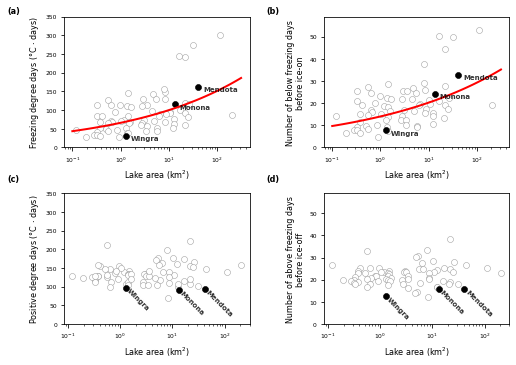

In [298]:
df_zero_mean = df_zero_merged.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').rename(lakecode_dict,axis=0)
df_zero_mean['Smoothed zero-crossing'] = - df_zero_mean['Smoothed zero-crossing']


xvar = 'Lake_area'
#xvar = 'Shore_len'
xlog = True

nrows = 2
ncols = 2
top_margin = 0.4
bottom_margin = 0.5
left_margin = 0.8
right_margin = 0.2
w_gap = 0.4
h_gap = 0.5
fig_width = two_column_width # inches
plot_width = (fig_width - left_margin - right_margin - (w_gap)*(ncols-1))/ncols
plot_height = plot_width *height_width_ratio
fig_height = bottom_margin + top_margin + plot_height*(nrows) + h_gap*(nrows-1)

#fig_width = two_column_width
#fig_height = fig_width*0.85

fig,axes = plt.subplots(2,2,figsize=(fig_width,fig_height),sharey=False,sharex=False)

for i,(df_z,label) in  enumerate(zip([df_zero_merged,df_zero_off_merged],['FDD_on','HDD_off'])):
    ax1 = axes.flatten()[i*2]
    ax2 = axes.flatten()[i*2+1]
    df_zero_mean = df_z.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').rename(lakecode_dict,axis=0)
    df_zero_mean['Smoothed zero-crossing'] = - df_zero_mean['Smoothed zero-crossing']

    df_zero_mean.plot(xvar,'Smoothed zero-crossing',ax=ax2,markeredgewidth=0.5,
                      legend=False,marker='o',markersize=6,markeredgecolor='0.6',
                      markerfacecolor='w',ls='none')
    df_zero_mean.loc[['mendota','wingra','monona'],:].plot(xvar,'Smoothed zero-crossing',legend=False,
                                                           ax=ax2,marker='o',markeredgecolor='k',markeredgewidth=0.5,
                                                           markersize=6,ls='none',markerfacecolor='k')
    
    
    df_zero_mean.plot(xvar,label,ax=ax1,
                      legend=False,marker='o',markersize=6,markeredgewidth=0.5,
                      markeredgecolor='0.6',markerfacecolor='w',ls='none')
    df_zero_mean.loc[['mendota','wingra','monona'],:].plot(xvar,label,legend=False,markeredgewidth=0.5,
                                                           ax=ax1,marker='o',markeredgecolor='k',markersize=6,ls='none',markerfacecolor='k')
    
    for lakename,row in df_zero_mean.loc[['mendota','wingra','monona'],:].iterrows():
        ax1.text(10**(np.log10(row[xvar])+0.1*(1-i)),row[label], lakename.title(), weight='bold', 
                 alpha=0.8,fontsize=annotation_txt_size,rotation=-45*i,va='top',ha='left')
        ax2.text(10**(np.log10(row[xvar])+0.1*(1-i)),row['Smoothed zero-crossing'], lakename.title(), weight='bold', 
                 alpha=0.8,fontsize=annotation_txt_size,rotation=-45*i,va='top',ha='left')



    for ax in [ax1,ax2]:
        if xlog:
            ax.set_xscale('log')
        ax.set_xlabel('Lake area (km$^2$)',fontsize=labelsize)
    ax1.set_ylim(0,350)
    ax2.set_ylim(0,59)
    ax1.tick_params(axis='both',labelsize=chsize)
    ax2.tick_params(axis='both',labelsize=chsize)
    if i==0:
        ax1.set_ylabel('Freezing degree days (\N{DEGREE SIGN}C $\cdot$ days)',fontsize=labelsize)
        ax2.set_ylabel('Number of below freezing days\nbefore ice-on',fontsize=labelsize)
    else:
        ax1.set_ylabel('Positive degree days (\N{DEGREE SIGN}C $\cdot$ days)',fontsize=labelsize)
        ax2.set_ylabel('Number of above freezing days\nbefore ice-off',fontsize=labelsize)
    if i==0:
        ax1.plot(np.logspace(-1,2.5,100),66*np.logspace(-1,2.5,100)**0.18,color='red',lw=2)
        ax2.plot(np.logspace(-1,2.5,100),14*np.logspace(-1,2.5,100)**0.16,color='red',lw=2)

for ii, lett in enumerate(['(a)','(b)','(c)','(d)']):
    
    ax1.text(0.02+(ii%2)*0.48,0.95-(ii // 2)*0.45,lett,ha='left',va='top',transform=fig.transFigure,weight='bold',fontsize=abcd_size)
    
fig.subplots_adjust(wspace=0.4,bottom = bottom_margin/fig_height,top=1- top_margin/fig_height,right=0.95,hspace=0.35)
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/fdd_on_gdd_off_and_days_area.pdf')
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/fdd_on_gdd_off_and_days_area.png',dpi=300)





### Modelling ice-on and ice-off
Explore relationship between mean freezing degree days and lake morphology, mean annual temperature

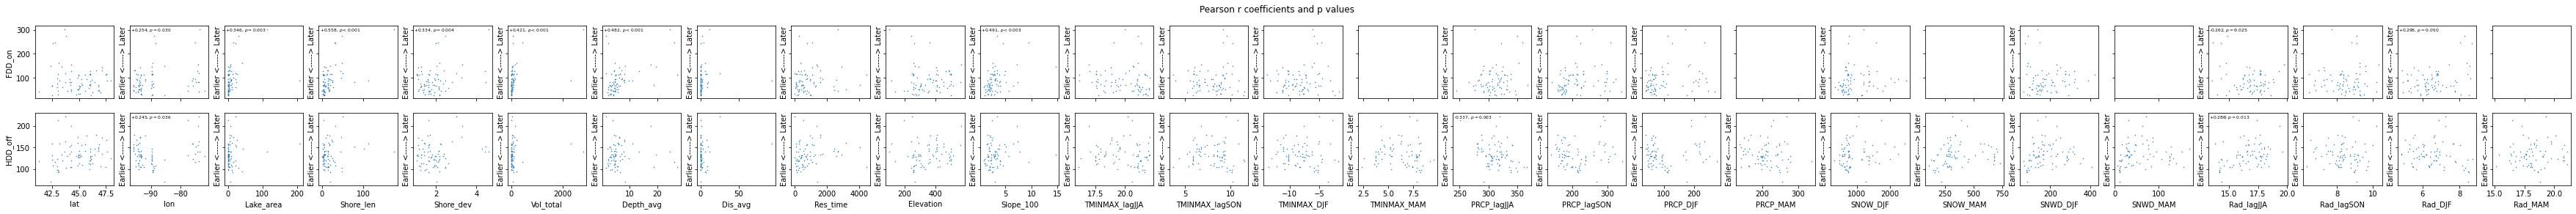

In [166]:
df_iceon_limited.groupby('lakecode').mean().loc[:,'lat':]
fig,axes = plt.subplots(2,27, sharey = 'row',sharex = 'col', figsize = [50,4])

all_extra = ['SNOW_lagJJA','SNWD_lagJJA','SNOW_lagSON','SNWD_lagSON']

dfcorr_p = pd.DataFrame()
#dfcorr_p = pd.DataFrame(columns = ['ice_on_doy','ice_on_doy_pval','ice_off_doy','ice_off_doy_pval'])
for ii,i in enumerate(['FDD_on','HDD_off']):
    if i == 'FDD_on':
        df_ = df_iceon_limited.groupby('lakecode').mean()
        extra = [c for c in df_.loc[:,'lat':].columns if (('MAM' in c))]# | ('SNWD' in c) | ('SNOW' in c))]
    else:
        df_ = df_iceoff_limited.groupby('lakecode').mean()
        extra = []
    y = df_.loc[:,i]
    X = df_.loc[:,'lat':].drop(['start_year','FDD_on','HDD_off','ice_on_doy','ice_off_doy','ice_duration']+all_extra,axis=1)
    iii = 0
    for c in X.columns:
        ax = axes[ii,iii]
        if c not in extra:
            x = X[c]
            ind = x.isnull() | y.isnull()
            r, pval = pearsonr(x[~ind],y[~ind])
            dfcorr_p.loc[c,i] = r
            dfcorr_p.loc[c,f"{i}_pval"] = pval
            ax.plot(X[c],y,marker='.',markersize=1,ls='none')
            if pval < 0.05:
                if pval < 0.001:
                    pvaltext = '$p<0.001$'
                else:
                    pvaltext = f'$p={pval:.3f}$'
                ax.text(0.01,0.99,f"{r:+.3f}, {pvaltext}", ha='left',va='top',fontsize=6,transform=ax.transAxes)
            if ii==1:
                ax.set_xlabel(c)
            if iii == 0:
                ax.set_ylabel(i)
            else:
                ax.set_ylabel('Earlier <-----> Later')
        iii = iii + 1
fig.suptitle('Pearson r coefficients and p values')
fig.subplots_adjust(left = 0.03,right=0.99)

fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/correlationsfddpdd.pdf')
dfcorr_p.astype(float).round(3).to_csv('/Users/blagrave/Projects/IcePhenologyModels/Figures/correlationsfddpdd.csv')

In [171]:
dfcorr_p.astype(float).round(3).reindex(dfcorr_p.FDD_on.abs().sort_values(ascending=False).index)

,FDD_on,FDD_on_pval,HDD_off,HDD_off_pval
Shore_len,0.558,0.000,0.161,0.172
Slope_100,0.491,0.000,0.141,0.230
Depth_avg,0.482,0.000,-0.020,0.865
Vol_total,0.421,0.000,0.091,0.441
Lake_area,0.346,0.003,0.120,0.309
Shore_dev,0.334,0.004,0.193,0.099
Rad_DJF,0.298,0.010,-0.201,0.085
Rad_lagJJA,-0.262,0.025,0.286,0.013
lon,0.254,0.030,0.245,0.036
PRCP_DJF,0.222,0.059,0.167,0.155


In [232]:
lake_variables = ['Shore_len','Slope_100','Depth_avg','Vol_total','Lake_area','Shore_dev']
from itertools import combinations
all_features = dict()

features = []
for r in range(1,len(lake_variables)+1):
#for r in range(1,9):
    #features.extend([list(np.arange(earliest, latest+1))+list(i) for i in combinations(['Lake_area',''], r)])
    #features.extend([list(i) for i in combinations(df_data0.columns[-13:],r)])
    features.extend([list(i) for i in combinations(lake_variables,r)])
all_features['normal'] = features


lake_variables = ['log_Shore_len','log_Slope_100','log_Depth_avg','log_Vol_total','log_Lake_area','log_Shore_dev']
features = []
for r in range(1,len(lake_variables)+1):
#for r in range(1,9):
    #features.extend([list(np.arange(earliest, latest+1))+list(i) for i in combinations(['Lake_area',''], r)])
    #features.extend([list(i) for i in combinations(df_data0.columns[-13:],r)])
    features.extend([list(i) for i in combinations(lake_variables,r)])
all_features['log'] = features

We are missing a 40 year mean annual temperature. This could be important for ice on FDD.

In [271]:
mean_tmp = df_iceon_limited[df_iceon_limited.start_year.isin([1989,1992,1993,1995])].groupby('lakecode').mean()['TMINMAX_JUN_MAY']

In [278]:
df_zero_mean

,Zero-crossing,Smoothed zero-crossing,start_year,Lake_area,Shore_len,Depth_avg,TMINMAX_JUN_MAY,HDD_off
lakecode,,,,,,,,
schroon,-37.380952,38.291101,1994.000000,21.87,49.69,1.5,8.270376,222.073810
placid,-33.333333,33.583280,1988.000000,7.90,32.98,17.6,5.096965,198.525000
deep,-35.062500,33.172485,1988.406250,0.56,4.28,4.0,9.111603,212.362500
little_mcdonald,-31.781250,30.644551,1993.218750,5.39,13.88,4.4,5.733448,178.151563
siseebakwet,-31.843750,30.437375,1991.781250,4.78,8.66,6.4,4.664225,171.603125
...,...,...,...,...,...,...,...,...
mendota,-15.272727,15.936816,2002.000000,41.12,49.20,4.8,8.176928,94.743939
tetonka,-16.766667,14.589089,1998.833333,4.97,14.61,18.8,7.305644,104.328333
cazenovia,-15.031250,13.930180,2001.500000,4.57,14.63,7.5,7.668688,122.984375


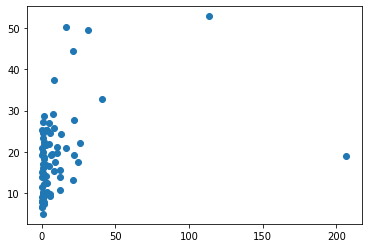

In [280]:
df_zero_mean = df_zero_merged.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').rename(lakecode_dict,axis=0)
df_zero_mean['Smoothed zero-crossing'] = - df_zero_mean['Smoothed zero-crossing']

X = df_zero_mean[['Lake_area']]
y = df_zero_mean['Smoothed zero-crossing']
plt.plot(X,y,marker='o',ls='none')



In [290]:
import statsmodels.api as sm

lake_variables = ['Shore_len','Slope_100','Depth_avg','Vol_total','Lake_area','Shore_dev']



df_iceon_limited['log_FDD_on'] = np.log10(df_iceon_limited['FDD_on'])
df_iceoff_limited['log_HDD_off'] = np.log10(df_iceoff_limited['HDD_off'])
for c in lake_variables:
    df_iceon_limited[f'log_{c}'] = np.log10(df_iceon_limited[c])
    df_iceoff_limited[f'log_{c}'] = np.log10(df_iceoff_limited[c])


df_result = pd.DataFrame()


df_zero_mean = df_zero_merged.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').rename(lakecode_dict,axis=0)
df_zero_mean['days_on'] = - df_zero_mean['Smoothed zero-crossing']
for c in lake_variables:
    df_zero_mean[f'log_{c}'] = np.log10(df_zero_mean[c])


for f2 in ['FDD_on','log_FDD_on', 'days_on', 'log_days_on']:
    if 'log' in f2:
        features = all_features['log']
    else:
        features = all_features['normal']
    for f in features:
        if 'FDD' in f2:
            X =df_iceon_limited.groupby('lakecode').mean()[f]
            y = df_iceon_limited.groupby('lakecode').mean()['FDD_on']
        else:
            X = df_zero_mean[f]
            y = df_zero_mean['days_on']
        if 'log' in f2:
            y = np.log10(y)
        ind = X.isnull().any(axis=1)| y.isnull()
        X = X[~ind]
        y = y[~ind]
        X = sm.add_constant(X)
        model = sm.OLS(y,X)
        model_results = model.fit()
        if (model_results.pvalues < 0.05).all():
            result = model_results.params.to_dict()
            result['AIC'] =  model_results.aic
            result['R2adj'] = model_results.rsquared_adj
            result['variable'] = f2
            result['Nobs'] = len(y)
            df_result = df_result.append(pd.DataFrame(result, index=[0]),ignore_index=True)

df_zero_mean = df_zero_off_merged.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').rename(lakecode_dict,axis=0)
df_zero_mean['days_off'] = - df_zero_mean['Smoothed zero-crossing']
for c in lake_variables:
    df_zero_mean[f'log_{c}'] = np.log10(df_zero_mean[c])

for f2 in ['HDD_off','log_HDD_off', 'days_off','log_days_off']:
    if 'log' in f2:
        features = all_features['log']
    else:
        features = all_features['normal']

    for f in features:
        if 'HDD' in f2:
            X =df_iceoff_limited.groupby('lakecode').mean()[f]
            y = df_iceoff_limited.groupby('lakecode').mean()['HDD_off']
        else:
            X = df_zero_mean[f]
            y = df_zero_mean['days_off']
        #X =df_iceoff_limited.groupby('lakecode').mean()[f]
        #y = df_iceoff_limited.groupby('lakecode').mean()['HDD_off']
        if 'log' in f2:
            y = np.log10(y)
        ind = X.isnull().any(axis=1)| y.isnull()
        X = X[~ind]
        y = y[~ind]
        X = sm.add_constant(X)
        model = sm.OLS(y,X)
        model_results = model.fit()
        if (model_results.pvalues < 0.05).all():
            result = model_results.params.to_dict()
            result['AIC'] =  model_results.aic
            result['R2adj'] = model_results.rsquared_adj
            result['variable'] = f2
            result['Nobs'] = len(y)
            df_result = df_result.append(pd.DataFrame(result, index=[0]),ignore_index=True)
        #else:
        #    print(model_results.pvalues)
    

In [292]:
df_result.sort_values(['variable','R2adj'],ascending=False).head(20)

,const,Shore_len,AIC,R2adj,variable,Nobs,Slope_100,Depth_avg,Vol_total,Lake_area,Shore_dev,log_Shore_len,log_Slope_100,log_Depth_avg,log_Vol_total,log_Lake_area,log_Shore_dev
68,1.188998,NaN,-63.992861,0.512795,log_days_on,73,NaN,NaN,NaN,NaN,NaN,-0.319150,0.511303,NaN,NaN,0.336178,NaN
71,1.013454,NaN,-63.960518,0.512579,log_days_on,73,NaN,NaN,NaN,NaN,NaN,NaN,0.511065,NaN,NaN,0.176579,-0.318087
69,0.819378,NaN,-63.923546,0.512332,log_days_on,73,NaN,NaN,NaN,NaN,NaN,0.353125,0.510944,NaN,NaN,NaN,-0.670903
72,1.209924,NaN,-62.187754,0.506948,log_days_on,73,NaN,NaN,NaN,NaN,NaN,-0.322288,0.537525,-0.386501,0.342560,NaN,NaN
73,1.032456,NaN,-62.184500,0.506926,log_days_on,73,NaN,NaN,NaN,NaN,NaN,NaN,0.537764,-0.225110,0.181418,NaN,-0.322092
66,0.965555,NaN,-60.783443,0.484231,log_days_on,73,NaN,NaN,NaN,NaN,NaN,NaN,0.463479,NaN,NaN,0.148572,NaN
65,0.918799,NaN,-57.679196,0.461826,log_days_on,73,NaN,NaN,NaN,NaN,NaN,NaN,0.389977,NaN,0.123767,NaN,NaN
63,0.834375,NaN,-51.671488,0.415662,log_days_on,73,NaN,NaN,NaN,NaN,NaN,0.202738,0.438923,NaN,NaN,NaN,NaN
61,1.054014,NaN,-40.073901,0.305937,log_days_on,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149548,NaN,NaN
67,1.007853,NaN,-38.906622,0.304006,log_days_on,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224315,NaN,0.132456,NaN


In [261]:
X = df_iceon_limited.groupby('lakecode').mean()[['Shore_len','Depth_avg','Vol_total','Shore_dev']]
X = df_iceon_limited.groupby('lakecode').mean()[['log_Lake_area']]


poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X)
columns = poly_reg.get_feature_names_out()
X_poly = pd.DataFrame(X_poly, index= X.index,columns = columns)


y = np.log10(df_iceon_limited.groupby('lakecode').mean()[['FDD_on']])
#plt.plot(X['Shore_len'],y,marker='o',ls='none')
mod = sm.OLS(y,X_poly)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 FDD_on   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     31.13
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           4.12e-07
Time:                        17:14:28   Log-Likelihood:                 17.178
No. Observations:                  73   AIC:                            -30.36
Df Residuals:                      71   BIC:                            -25.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
1                 1.8155      0.027     67.104      0.000       1.762       1.869
log_Lake_area     0.1826      0.033      5.579      0.000       0.117       0.248
==============================================================================
Omnibus:                        7.039   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                2.763
Skew:                           0.092   Prob(JB):                        0.251
Kurtosis:                       2.065   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
df_zero_merged.groupby('lakecode').mean()
dfmean['log_FDD_on'], y

(lakecode
 DMR1       2.211370
 DMR2       2.062503
 HB01       1.659548
 JD01       1.788921
 JGL01      1.776947
              ...   
 xKB1640    2.153874
 xKB1746    1.710244
 xKB1774    1.848368
 xKB1921    1.709468
 xKB1987    1.534251
 Name: log_FDD_on, Length: 73, dtype: float64,
           log_FDD_on
 lakecode            
 DMR1        2.202729
 DMR2        2.045447
 HB01        1.628051
 JD01        1.764455
 JGL01       1.734158
 ...              ...
 xKB1640     2.140197
 xKB1746     1.602996
 xKB1774     1.820956
 xKB1921     1.619253
 xKB1987     1.456119
 
 [73 rows x 1 columns])

(73, 11)


,1,log_Lake_area
lakecode,,
DMR1,1.0,1.614053
DMR2,1.0,1.124504
HB01,1.0,-0.920819
JD01,1.0,1.098298
JGL01,1.0,1.328380
...,...,...
xKB1640,1.0,0.679428
xKB1746,1.0,0.107210
xKB1774,1.0,0.696356


                            OLS Regression Results                            
Dep. Variable:             log_FDD_on   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     31.13
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           4.12e-07
Time:                        17:01:21   Log-Likelihood:                 17.178
No. Observations:                  73   AIC:                            -30.36
Df Residuals:                      71   BIC:                            -25.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
1                 1.8155      0.027     67.104

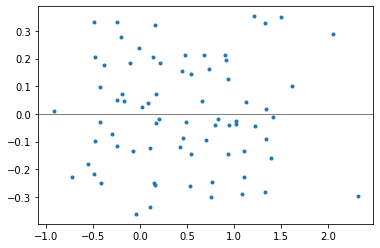

In [244]:
working_x = 'log_Lake_area'
working_y = 'log_FDD_on'

dfmean = df_zero_merged.groupby('lakecode').mean()
dfmean['Sqrt_Lake_area'] = np.sqrt(dfmean['Lake_area']) 
dfmean['log_Lake_area'] = np.log10(dfmean['Lake_area'])
dfmean['log_FDD_on'] = np.log10(dfmean['FDD_on'])

print(dfmean.shape)
ind = dfmean['log_Lake_area'] < 50

y = dfmean.loc[ind,working_y]
X = dfmean.loc[ind,[working_x]]#,'TMINMAX_JUN_MAY']]

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X)
columns = poly_reg.get_feature_names_out()
X_poly = pd.DataFrame(X_poly, index= X.index,columns = columns)

display(X_poly)

lin_reg = LinearRegression()
lin_result = lin_reg.fit(X_poly,y)

mod = sm.OLS(y,X_poly)
res = mod.fit()

plt.plot(X[working_x],y-lin_reg.predict(X_poly),marker='.',ls='none')
plt.gca().axhline(0,color='k',lw=0.5)
print(res.summary())

,Lake_area,Depth_avg,TMINMAX_JUN_MAY
lakecode,,,
DMR1,41.12,4.8,8.152873
DMR2,13.32,6.6,8.656235
HB01,0.12,4.8,6.049308
JD01,12.54,5.5,8.501855
JGL01,21.30,2.3,7.556211
...,...,...,...
xKB1640,4.78,6.4,4.627208
xKB1746,1.28,2.3,6.630803
xKB1774,4.97,18.8,7.270144


In [54]:
plot_width,plot_height

(1.325, 0.8188950350936106)

In [405]:
df_zero_merged.groupby('lakecode').mean().rename(lakecode_dict,axis=0).loc[['mendota','wingra'],:]

,Zero-crossing,Smoothed zero-crossing,start_year,Lake_area,FDD_on
lakecode,,,,,
mendota,-31.258065,-32.829507,2003.0,41.12,162.693548
wingra,-7.612903,-7.775485,2004.0,1.28,31.546774


In [399]:
display(df_zero_merged.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').quantile(0.95))
display(df_zero_merged.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').quantile(0.05))


display(df_zero_merged.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').describe())


display(df_zero_off_merged.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').quantile(0.95))
display(df_zero_off_merged.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').quantile(0.05))


display(df_zero_off_merged.groupby('lakecode').mean().sort_values('Smoothed zero-crossing').describe())




Zero-crossing               -7.922581
Smoothed zero-crossing      -7.640589
start_year                2003.051613
Lake_area                   28.178000
FDD_on                     194.877419
Name: 0.95, dtype: float64

Zero-crossing              -39.341935
Smoothed zero-crossing     -40.246808
start_year                1987.909677
Lake_area                    0.320000
FDD_on                      31.938710
Name: 0.05, dtype: float64

,Zero-crossing,Smoothed zero-crossing,start_year,Lake_area,FDD_on
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,-18.965532,-19.153158,1995.228458,10.578904,91.246598
std,9.539535,10.015516,5.850383,27.740012,54.392908
min,-50.516129,-52.922245,1980.000000,0.120000,27.945161
25%,-22.709677,-23.417708,1989.548387,0.780000,52.898333
50%,-17.419355,-17.498079,1995.225806,2.850000,81.037097
75%,-12.193548,-12.345087,2000.806452,8.710000,113.593548
max,-5.967742,-4.917304,2004.000000,206.850000,301.861290


Zero-crossing              -16.159091
Smoothed zero-crossing     -15.465111
start_year                2002.164062
Lake_area                   34.763000
HDD_off                    177.031759
Name: 0.95, dtype: float64

Zero-crossing              -31.803125
Smoothed zero-crossing     -30.509886
start_year                1987.325000
Lake_area                    0.320000
HDD_off                     98.123258
Name: 0.05, dtype: float64

,Zero-crossing,Smoothed zero-crossing,start_year,Lake_area,HDD_off
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,-23.557260,-21.932194,1994.885512,11.036486,133.466472
std,4.633045,4.747833,5.588102,27.829145,27.324688
min,-37.380952,-38.291101,1979.000000,0.120000,69.854545
25%,-26.318966,-24.266763,1990.387769,0.795000,114.300785
50%,-23.142424,-21.633558,1995.068182,2.905000,129.976358
75%,-20.820786,-18.979381,1999.744242,9.970000,147.207481
max,-13.424242,-12.138987,2003.000000,206.850000,222.073810


In [217]:
#iceon_antecedent.loc[ind_keep_on,-183:182].T.mean()
#iceoff_antecedent.loc[ind_keep_off,'ice_off_doy'] - iceoff_antecedent.loc[ind_keep_off,'ice_on_doy']

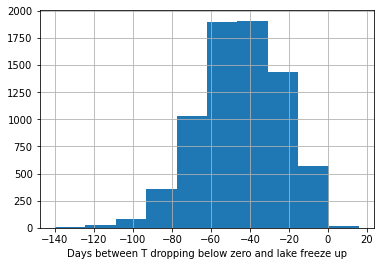

In [218]:
ind = (iceon_antecedent.loc[ind_keep_on,-183:182] <= 0)
(ind==True).idxmax(axis=1).hist()

plt.xlabel('Days between T dropping below zero and lake freeze up')
plt.show()

In [23]:
iceon_antecedent[ind_keep_on].start_year

17      1869.0
18      1870.0
19      1871.0
20      1872.0
21      1873.0
         ...  
7999    2012.0
8000    2013.0
8001    2014.0
8002    2015.0
8003    2016.0
Name: start_year, Length: 7322, dtype: float64

Large deep lakes 2108
Small shallow lakes 1884


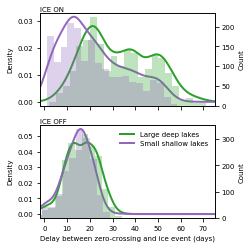

In [24]:
from scipy import stats


chsize = 7

alpha = 0.3
period = 7 # 1 week
fig, axes = plt.subplots(2,1,figsize=(88./25.4, 88./25.4),sharex=True)
ind_large = (iceon_antecedent.Depth_avg >= iceon_antecedent.Depth_avg.median()) & (iceon_antecedent.Lake_area >= iceon_antecedent.Lake_area.median())
ind_small = (iceon_antecedent.Depth_avg < iceon_antecedent.Depth_avg.median()) & (iceon_antecedent.Lake_area < iceon_antecedent.Lake_area.median())

colors = ['C2','C4']

pops = []

ax = axes.flatten()[0]
ax2 = ax.twinx()
for ind2,label,c in zip([ind_large,ind_small],['Large and deep lakes','Small and shallow lakes'],colors):
    ind = (iceon_antecedent.loc[ind_keep_on & ind2,-183:182].rolling(period).mean() <= 0)
    
    x = -(ind==True).idxmax(axis=1)
    pops.append(x)
    kde = stats.gaussian_kde(x)
    xx = np.linspace(-5,150, 1000)
    ax2.hist(x,label=label,bins=60,alpha=alpha,facecolor=c)
    ax.plot(xx,kde(xx),ls='-',lw=2,color=c,label=label)
    #(-(ind==True).idxmax(axis=1)).plot.kde(label=label,alpha=1.0,color='C0',ls = ['-',':'][c],ax=ax)
    #(-(ind==True).idxmax(axis=1)).hist(label=label,bins=30,alpha=0.3,color=f"C{c}",ax=ax)
#ax.set_xlim(-5,150)
ax.text(0,1,'ICE ON',va='bottom',ha='left',fontsize=chsize,transform = ax.transAxes)
#ax.legend(fontsize=chsize, frameon=False,bbox_to_anchor=(1,1),loc='upper right')



#ax.text(0.9,0.96,'ICE ON',va='top',ha='right',fontsize=chsize,transform = ax.transAxes)
#plt.legend()
#ax.set_xlabel('Delay between zero-crossing and ice-on (days)')
ax.tick_params(axis='both', labelsize=chsize)
ax.set_ylabel('Density',fontsize=chsize)
ax2.tick_params(axis='both', labelsize=chsize)
ax2.set_ylabel('Count',fontsize=chsize)



ax = axes.flatten()[1]
ax2 = ax.twinx()

ind_large = (iceoff_antecedent.Depth_avg >= iceoff_antecedent.Depth_avg.median()) & (iceoff_antecedent.Lake_area >= iceoff_antecedent.Lake_area.median())
ind_small = (iceoff_antecedent.Depth_avg < iceoff_antecedent.Depth_avg.median()) & (iceoff_antecedent.Lake_area < iceoff_antecedent.Lake_area.median())
for ind2,label,c in zip([ind_large,ind_small],['Large deep lakes','Small shallow lakes'],colors):
    ind = (iceoff_antecedent.loc[ind_keep_off & ind2,-183:10].rolling(period).mean() <= 0)
    #ind = (iceon_antecedent.loc[ind_keep_on & ind2,-183:182].rolling(period).mean() <= 0)
    print(label, ind2.sum())

    x = -(ind==True).iloc[:,::-1].idxmax(axis=1)
    pops.append(x)
    kde = stats.gaussian_kde(x)
    xx = np.linspace(-5,150, 1000)
    ax2.hist(x,label=label,bins=15,alpha=alpha,facecolor=c)
    ax.plot(xx,kde(xx),ls='-',lw=2,color=c, label=label)
    #(-(ind==True).idxmax(axis=1)).plot.kde(label=label,alpha=1.0,color='C0',ls = ['-',':'][c],ax=ax)
    #(-(ind==True).idxmax(axis=1)).hist(label=label,bins=30,alpha=0.3,color=f"C{c}",ax=ax)
    #(-(ind==True).idxmax(axis=1)).plot.kde(label=label,alpha=1.0,color='C1',ls = ['-',':'][c], ax=ax)
    #(-(ind == True).iloc[:,::-1].idxmax(axis=1)).plot.kde(label=label,alpha=1.0,color='C1',ls = ['-',':'][c], ax=ax)
    #(-(ind == True).iloc[:,::-1].idxmax(axis=1)).hist(label=label,bins=30,alpha=0.3,ax=ax,color=f"C{c}")
    #(-(ind==True).idxmax(axis=1)).hist(label=label,bins=30,alpha=0.3,color=f"C{c}")
    #c = c+1
ax.set_xlim(-2,75)
ax.tick_params(axis='both', labelsize=chsize)
ax.set_ylabel('Density',fontsize=chsize)
ax2.tick_params(axis='both', labelsize=chsize)
ax2.set_ylabel('Count',fontsize=chsize)


ax.text(0,1,'ICE OFF',va='bottom',ha='left',fontsize=chsize,transform = ax.transAxes)



ax.legend(fontsize=chsize, frameon=False,bbox_to_anchor=(1,1),loc='upper right')
ax.set_xlabel('Delay between zero-crossing and ice event (days)',fontsize=chsize)
ax.set_ylabel(ax.get_ylabel(),fontsize=chsize)


fig.subplots_adjust(left=0.15,right=0.85,top=0.95,hspace=0.2)
fig.savefig(f'/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_event_delay{mergedversion}.pdf')
fig.savefig(f'/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_event_delay{mergedversion}.png',dpi=300)




array([[<AxesSubplot:title={'center':'start_year'}>,
        <AxesSubplot:title={'center':'0'}>]], dtype=object)

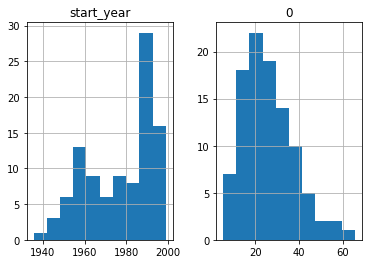

In [25]:
ind = iceon_antecedent.set_index(['lakecode',
                                  'start_year']).loc[:,-183:10].rolling(7).mean()<0
x = -(ind==True).idxmax(axis=1)
x[x>150] = np.nan
x.reset_index().groupby('lakecode').mean().hist()

In [26]:
ind = iceon_antecedent[~iceon_antecedent.Depth_avg.isnull()].groupby('lakecode').mean()<0
x = -(ind==True).idxmax(axis=1)
x[x==x.max()]
iceon_antecedent[~iceon_antecedent.Depth_avg.isnull()].drop_duplicates('lakecode').lon.min()


-95.933

In [27]:
iceon_antecedent[iceon_antecedent.lakecode.isin(['KMS10','MICH06'])].drop_duplicates('lakecode').iloc[:,-30:]

,FDD_on,HDD_off,ice_on_doy,ice_off_doy,ice_duration,Lake_area,Shore_len,Shore_dev,Vol_total,Depth_avg,...,PRCP_DJF,PRCP_MAM,SNOW_lagJJA,SNOW_lagSON,SNOW_DJF,SNOW_MAM,SNWD_lagJJA,SNWD_lagSON,SNWD_DJF,SNWD_MAM
2257,NaN,NaN,NaN,NaN,NaN,113.39,173.46,4.60,2775.30,24.5,...,NaN,117.9,NaN,NaN,NaN,431.0,NaN,NaN,NaN,141.771383
4343,NaN,NaN,NaN,NaN,NaN,0.91,6.41,1.89,3.81,4.2,...,NaN,164.0,NaN,NaN,NaN,228.0,NaN,NaN,NaN,6.641304


In [28]:
from netCDF4 import Dataset

In [30]:
#ds = Dataset('gfdl-esm4_r1i1p1f1_w5e5_ssp585_tasAdjust_landonly2b_daily_2091_2100.nc')

In [31]:
from scipy.stats import mannwhitneyu, ttest_ind
print(mannwhitneyu(pops[1],pops[0],alternative='less'))
print(ttest_ind(pops[3],pops[2]))
print(pops[1].mean(),pops[0].mean())
print(pops[3].mean(),pops[2].mean())

MannwhitneyuResult(statistic=1109244.0, pvalue=1.515700800538604e-117)
Ttest_indResult(statistic=-11.14266978863197, pvalue=2.0623048463854904e-28)
22.14878706199461 33.18286814244466
10.977873718294658 14.51081210956271


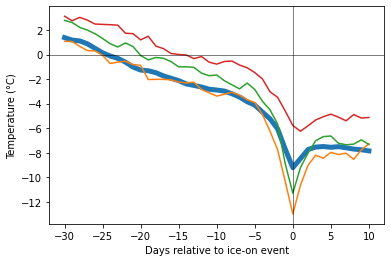

In [32]:

minday = -30
maxday = 10

iceon_antecedent.loc[:,minday:maxday].T.mean(axis=1).plot(lw=5,label='All lakes mean')



for lc in ['DMR1','DMR2','JJM18']:
    ind = iceon_antecedent.lakecode==lc
    iceon_antecedent.loc[ind,minday:maxday].T.mean(axis=1).plot(label=f"{lakecode_dict[lc]} mean")
plt.xlabel('Days relative to ice-on event')
plt.axhline(0,color='k',lw=0.5)
plt.axvline(0,color='k',lw=0.5)
plt.ylabel('Temperature (\N{DEGREE SIGN}C)')
plt.show()

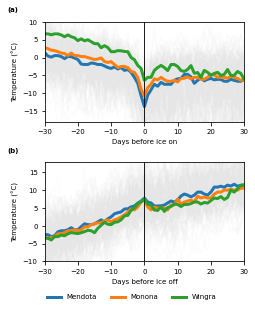

In [33]:
fig_width = 88./25.4
fig,axes = plt.subplots(2,1, figsize = (fig_width,fig_width*1.2))
fontsize = 7
lw = 3
i = 0
plots = []
for name,group in df_data0.groupby('lakecode'):
    if name not in ['DMR1','DMR2','JJM18']:
        continue
    color = f'C{i}'
    newgroup = group.set_index('start_year').apply(lambda row: row.loc[-183:182].shift(-int(row.ice_on_doy)) 
                                                   if not np.isnan(row.ice_on_doy) else row.loc[-183:182]*np.nan,
                                                   axis=1).T
    
    if name=='DMR1':
        newgroup.plot(alpha=0.1,color='0.9',label = ['_nolegend_']*newgroup.shape[1], legend=False,ax = axes[0])
    plot = axes[0].plot(newgroup.median(axis=1), lw=lw, color=color,label=lakecode_dict[name].title())
    plots.append(plot)
    newgroup = group.set_index('start_year').apply(lambda row: row.loc[-183:182].shift(-int(row.ice_off_doy)) 
                                                   if not np.isnan(row.ice_off_doy) else row.loc[-183:182]*np.nan,
                                                   axis=1).T
    
    if name=='DMR1':
        newgroup.plot(alpha=0.1,color='0.9',legend=False, ax = axes[1])
    axes[1].plot(newgroup.median(axis=1), lw=lw, color=color,label=name)
    #newgroup.median(axis=1).plot(lw=lw,ax = axes[1], color=color)
    for ax in axes.flatten():
        ax.set_xlim(-30,30)
        ax.set_ylim(-20,15)
        ax.axvline(0,color='k',lw=0.5)
        ax.set_ylabel('Temperature (\N{DEGREE SIGN}C)', fontsize=fontsize)
    i= i+1
    
for ax in axes.flatten():
    ax.tick_params(axis='both',labelsize=fontsize)
    
axes[0].set_ylim(-18,10)
axes[0].set_xlabel('Days before ice on',fontsize=fontsize)
axes[1].set_xlabel('Days before ice off',fontsize=fontsize)
axes[1].set_ylim(-10,18)

h, l = axes[0].get_legend_handles_labels()
legend = [(i,j) for i,j in zip(h,l) if j.isalpha()]
axes[1].legend([i[0] for i in legend],[i[1] for i in legend],bbox_to_anchor=(0.5,0.),
               loc = 'lower center',fontsize=fontsize,
               ncol=3,frameon=False,bbox_transform=fig.transFigure)
axes[0].text(0,1,'(a)',va='top',ha='left',transform=fig.transFigure,weight='bold',fontsize=fontsize)
axes[0].text(0,0.53,'(b)',va='top',ha='left',transform=fig.transFigure,weight='bold',fontsize=fontsize)

fig.subplots_adjust(bottom=0.15,top=0.95,left=0.15, right=0.95,hspace=0.4)
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_antecedent_temps.pdf')
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/ice_antecedent_temps.png',dpi=300)

plt.show()

## Lake size and FDD

In [34]:
df_all_seasons.columns[-30:]
lakecode_dict
df_all_seasons[df_all_seasons.lakecode=='DMR1'].lon

136   -89.42
137   -89.42
138   -89.42
139   -89.42
140   -89.42
141   -89.42
142   -89.42
143   -89.42
144   -89.42
145   -89.42
146   -89.42
147   -89.42
148   -89.42
149   -89.42
150   -89.42
151   -89.42
152   -89.42
153   -89.42
154   -89.42
155   -89.42
156   -89.42
157   -89.42
158   -89.42
159   -89.42
160   -89.42
161   -89.42
162   -89.42
163   -89.42
164   -89.42
165   -89.42
166   -89.42
134   -89.42
135   -89.42
Name: lon, dtype: float64

/var/folders/sd/xlwt40n56h1f5l08cxsb644r0000gn/T/ipykernel_994/3597530169.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  scatplot = ax.scatter(df_all_seasons['Lake_area'],df_all_seasons['FDD_on'],


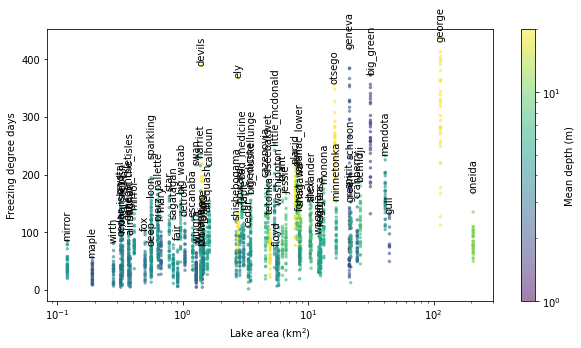

In [35]:
fig,ax = plt.subplots(figsize=(10,5))
scatplot = ax.scatter(df_all_seasons['Lake_area'],df_all_seasons['FDD_on'],
            c=df_all_seasons['Depth_avg'],vmin=1,vmax=20,s=6,alpha=0.5,
            marker='o',norm=mpl.colors.LogNorm())
for name,group in df_all_seasons.groupby('lakecode'):
    ax.text(group.Lake_area.mean(),group.FDD_on.max(), lakecode_dict[group.lakecode.values[0]], rotation=90,va='bottom',ha='center')
ax.set_xscale('log')
ax.set_ylabel('Freezing degree days')
ax.set_xlabel('Lake area (km$^2$)')
fig.colorbar(scatplot,label='Mean depth (m)')

/var/folders/sd/xlwt40n56h1f5l08cxsb644r0000gn/T/ipykernel_994/1130077913.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  scatplot = ax.scatter(df_all_seasons.groupby('lakecode')['Lake_area'].median(),df_all_seasons.groupby('lakecode')['FDD_on'].median(),


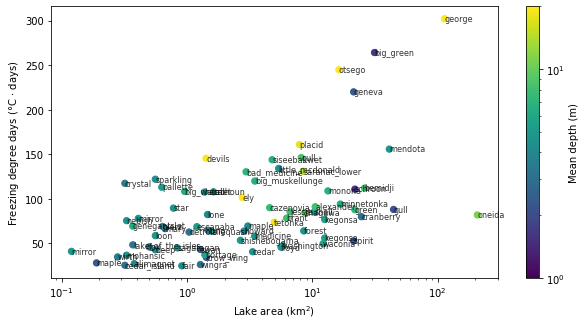

In [36]:
fig,ax = plt.subplots(figsize=(10,5))
scatplot = ax.scatter(df_all_seasons.groupby('lakecode')['Lake_area'].median(),df_all_seasons.groupby('lakecode')['FDD_on'].median(),
            c=df_all_seasons.groupby('lakecode')['Depth_avg'].median(),vmin=1,vmax=20,s=40,alpha=1.0,
            marker='o',norm=mpl.colors.LogNorm())
for name,group in df_all_seasons.groupby('lakecode'):
    ax.text(group.Lake_area.mean(),group.FDD_on.median(), lakecode_dict[group.lakecode.values[0]], alpha=0.8,fontsize=8,rotation=0,va='center',ha='left')
ax.set_xscale('log')
ax.set_ylabel('Freezing degree days (\N{DEGREE SIGN}C $\cdot$ days)')
ax.set_xlabel('Lake area (km$^2$)')
fig.colorbar(scatplot,label='Mean depth (m)')
fig.savefig('/Users/blagrave/Projects/IcePhenologyModels/Figures/fdd_iceon_area_depth_lakenames.pdf')

In [54]:
from scipy.stats import pearsonr


for dd in ['FDD_on','HDD_off']:
    for c in ['Lake_area','Depth_avg','Slope_100','Elevation','Shore_len','Vol_total','Shore_dev','Res_time','Dis_avg']:   
        #xx = df_all_seasons.groupby('lakecode')[c].median()
        #yy = df_all_seasons.groupby('lakecode')[dd].median()
        xx = df_all_seasons.groupby('lakecode')[c].mean()
        yy = df_all_seasons.groupby('lakecode')[dd].mean()
        print(dd,c)
        print([f"{i:.3f}" for i in pearsonr(xx,yy)])
    #print(c,'MEAN',"STD")
    #print(df_all_seasons.groupby('lakecode')[dd].mean().mean())
    #print(df_all_seasons.groupby('lakecode')[dd].std().describe())

dfsum = df_all_seasons.groupby('lakecode')[
    ['lat','lon','Lake_area','Depth_avg','Slope_100','Elevation','Shore_len','Vol_total',
     'Shore_dev','Res_time','Dis_avg']].apply(lambda x: x.median()) #" ({x.min()}-{x.max()})")


dfsum = dfsum.merge(df_all_seasons.groupby('lakecode')['FDD_on'].apply(lambda x: f"{x.mean():.0f} ({x.min():.0f}-{x.max():.0f})" ),left_index=True,right_index=True)
dfsum = dfsum.merge(df_all_seasons.groupby('lakecode')['HDD_off'].apply(lambda x: f"{x.mean():.0f} ({x.min():.0f}-{x.max():.0f})" ),left_index=True,right_index=True)


dfsum['Lake name'] = [lakecode_dict[i] for i in dfsum.index]
dfsum['Lake name'] = dfsum['Lake name'].str.title().str.replace('_',' ')
dfsum['lat'] = dfsum['lat'].apply(lambda x: f"{x:.3f}")
dfsum['lon'] = dfsum['lon'].apply(lambda x: f"{x:.3f}")
for cc in ['Lake_area','Shore_len','Vol_total','Shore_dev']:
    dfsum[cc] = dfsum[cc].apply(lambda x: f"{x:.2f}")
dfsum['Elevation'] = dfsum['Elevation'].astype(int)

dfsum[['Lake name','lat','lon','FDD_on','HDD_off','Lake_area','Depth_avg','Elevation','Shore_len','Vol_total','Shore_dev']].sort_values('lat').to_csv(f'../Data/fdd_gdd_mean_summary{mergedversion}.csv',index=False)

FDD_on Lake_area
['0.343', '0.003']
FDD_on Depth_avg
['0.489', '0.000']
FDD_on Slope_100
['0.495', '0.000']
FDD_on Elevation
['-0.071', '0.548']
FDD_on Shore_len
['0.528', '0.000']
FDD_on Vol_total
['0.425', '0.000']
FDD_on Shore_dev
['0.319', '0.006']
FDD_on Res_time
['0.143', '0.223']
FDD_on Dis_avg
['0.097', '0.412']
HDD_off Lake_area
['0.120', '0.310']
HDD_off Depth_avg
['-0.022', '0.851']
HDD_off Slope_100
['0.140', '0.233']
HDD_off Elevation
['0.109', '0.357']
HDD_off Shore_len
['0.163', '0.166']
HDD_off Vol_total
['0.089', '0.449']
HDD_off Shore_dev
['0.195', '0.095']
HDD_off Res_time
['0.119', '0.313']
HDD_off Dis_avg
['0.178', '0.130']


In [39]:
dfsum.HDD_off.str.split().str[0].astype(int).min()

70

array(['Alexander', 'Alimagnet', 'Allequash', 'Bad Medicine', 'Bemidji',
       'Big Green', 'Big Muskellunge', 'Big Watab', 'Brant', 'Calhoun',
       'Cazenovia', 'Cedar', 'Cedar Island', 'Cranberry', 'Crow Wing',
       'Crystal', 'Deep', 'Detroit', 'Devils', 'Ely', 'Escanaba', 'Fair',
       'Floyd', 'Forest', 'Fox', 'Genegantslet', 'Geneva', 'George',
       'Green', 'Gull', 'Gull', 'Harriet', 'Howard', 'Jessie', 'Kegonsa',
       'Kegonsa', 'Lake Of The Isles', 'Little Mcdonald', 'Lone', 'Long',
       'Loon', 'Maple', 'Maple', 'Mary', 'Medicine', 'Mendota',
       'Minnetonka', 'Mirror', 'Mirror', 'Mohansic', 'Monona', 'Nebish',
       'Oneida', 'Otsego', 'Pallette', 'Pierz', 'Placid', 'Portage',
       'Sagatagan', 'Saranac Lower', 'Schroon', 'Shagawa', 'Shell',
       'Shishebogama', 'Siseebakwet', 'Sparkling', 'Spirit', 'Star',
       'Swan', 'Tetonka', 'Waconia', 'Washington', 'Wingra', 'Wirth'],
      dtype=object)

(0.34281969625823994, 0.0027896643496062436)


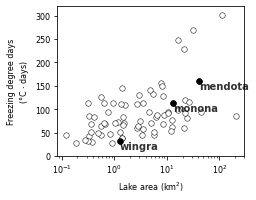

In [31]:
chsize=8
labelsize=12
fig,ax = plt.subplots(figsize=(88./25.4, 88./25.4*0.8))


# changed to mean
xx = df_all_seasons.groupby('lakecode')['Lake_area'].median()
yy = df_all_seasons.groupby('lakecode')['FDD_on'].median()
xx = df_all_seasons.groupby('lakecode')['Lake_area'].mean()
yy = df_all_seasons.groupby('lakecode')['FDD_on'].mean()
print(pearsonr(xx,yy))

scatplot = ax.scatter(xx,yy,
                      color='0.6',
            #c=df_all_seasons.groupby('lakecode')['Depth_avg'].median(),
                      #vmin=1,vmax=20,
                      s=30,alpha=1.0,
            marker='o',edgecolor='k',facecolor='w',lw=0.5)#,norm=mpl.colors.LogNorm())
for name,group in df_all_seasons.groupby('lakecode'):
    if name in ['DMR1','DMR2','JJM18']:
        ax.scatter(group.Lake_area.mean(),group.FDD_on.mean(),marker='o',s=30,edgecolor='k',facecolor='k',lw=1.0)
        ax.text(group.Lake_area.mean(),group.FDD_on.mean(), lakecode_dict[group.lakecode.values[0]], weight='bold', alpha=0.8,fontsize=10,rotation=0,va='top',ha='left')
ax.set_xscale('log')
ax.set_ylim(0,320)
ax.tick_params(axis='both',labelsize=chsize)
ax.set_ylabel('Freezing degree days\n(\N{DEGREE SIGN}C $\cdot$ days)',fontsize=labelsize)
ax.set_xlabel('Lake area (km$^2$)',fontsize=labelsize)
#fig.colorbar(scatplot,label='Mean depth (m)')
fig.subplots_adjust(left=0.2,right=0.95,top=0.95,bottom=0.2)
fig.savefig(f'/Users/blagrave/Projects/IcePhenologyModels/Figures/fdd_iceon_area{mergedversion}.pdf')
fig.savefig(f'/Users/blagrave/Projects/IcePhenologyModels/Figures/fdd_iceon_area{mergedversion}.png',dpi=300)

In [32]:
y =  df_all_seasons.groupby('lakecode')['FDD_on'].median()

y =  df_all_seasons.groupby('lakecode')['FDD_on'].mean()


X = df_all_seasons[['lakecode','Lake_area','TMINMAX_lagJJA','TMINMAX_lagSON','TMINMAX_DJF',
                    'Slope_100','Depth_avg','Elevation','Shore_dev','Shore_len']].groupby('lakecode').median()
X = X.loc[y.index,:]

# predict mean FDD using lake values only
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=31,oob_score=True)
rf.fit(X,y)

/Users/blagrave/.virtualenvs/icemodels/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RandomForestRegressor(oob_score=True, random_state=31)

In [33]:
rf.feature_importances_, rf.oob_score_

(array([0.09618703, 0.04507802, 0.05719542, 0.03534771, 0.18584086,
        0.18006051, 0.06808342, 0.06140967, 0.27079736]),
 0.27411345822079314)

<AxesSubplot:>

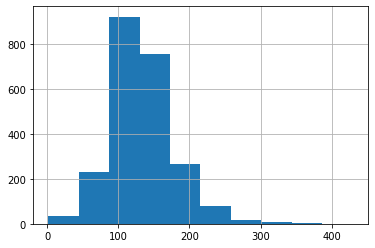

In [34]:
df_all_seasons.HDD_off.hist()

In [ ]:
vari = 'Depth_avg'
vari = 'Lake_area'

xx=df_all_seasons.groupby('lakecode')[vari].median()
yy=                      df_all_seasons.groupby('lakecode')['HDD_off'].median()
yy=                      df_all_seasons.groupby('lakecode')['HDD_off'].mean()


print(pearsonr(xx,yy))


fig,ax = plt.subplots(figsize=(88./25.4, 88./25.4*0.8))
scatplot = ax.scatter(xx,yy,
                      color='0.6',
            #c=df_all_seasons.groupby('lakecode')['Depth_avg'].median(),
                      #vmin=1,vmax=20,
                      s=30,alpha=1.0,
            marker='o',edgecolor='k',facecolor='w',lw=0.5)#,norm=mpl.colors.LogNorm())

#for name,group in df_all_seasons.groupby('lakecode'):
#    ax.text(group.Lake_area.mean(),group.FDD_on.median(), lakecode_dict[group.lakecode.values[0]], alpha=0.8,fontsize=8,rotation=0,va='center',ha='left')
for name,group in df_all_seasons.groupby('lakecode'):
    if name in ['DMR1','DMR2','JJM18']:
        ax.scatter(group.Lake_area.mean(),group.HDD_off.mean(),marker='o',s=30,edgecolor='k',facecolor='k',lw=1.0)
        ax.text(group.Lake_area.mean(),group.HDD_off.mean(), lakecode_dict[group.lakecode.values[0]], weight='bold', alpha=0.8,fontsize=10,rotation=-45,va='top',ha='left')

ax.set_xscale('log')
ax.set_ylim(0,320)
ax.set_ylabel('Growing degree days\n(\N{DEGREE SIGN}C $\cdot$ days)',fontsize=chsize)
ax.set_xlabel('Lake area (km$^2$)',fontsize=chsize)

#ax.set_xlabel('Lake area (km$^2$)')
ax.tick_params(axis='both',labelsize=chsize)

fig.subplots_adjust(left=0.2,right=0.95,top=0.95,bottom=0.2)

#fig.colorbar(scatplot,label='Mean depth (m)')
fig.savefig(f'/Users/blagrave/Projects/IcePhenologyModels/Figures/hdd_iceoff_area{mergedversion}.pdf')
fig.savefig(f'/Users/blagrave/Projects/IcePhenologyModels/Figures/hdd_iceoff_area{mergedversion}.png',dpi=300)

In [50]:
df_all_seasons[df_all_seasons.lakecode.isin(['DMR1','DMR2','JJM18'])].sort_values(['start_year','lakecode'])

,-183,-182,-181,-180,-179,-178,-177,-176,-175,-174,...,Vol_total,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,TMINMAX_lagSON,TMINMAX_lagJJA,TMINMAX_DJF,TMINMAX_MAM
134,14.20,16.40,17.75,20.85,26.95,28.05,22.25,22.50,22.25,19.75,...,197.40,4.8,6.047,377.8,258.0,2.61,8.571978,20.195652,-3.737222,9.591848
301,15.80,20.60,17.80,24.75,27.75,28.05,24.15,22.50,21.40,18.35,...,88.59,6.6,6.856,149.6,256.0,2.36,9.384066,21.076630,-3.048889,10.314674
1971,15.80,20.60,17.80,24.75,27.75,28.05,24.15,22.50,21.40,18.35,...,3.92,3.1,0.204,222.3,257.0,1.69,9.384066,21.076630,-3.048889,10.314674
135,19.45,20.30,23.05,20.80,20.85,21.10,23.05,25.55,27.50,26.70,...,197.40,4.8,6.047,377.8,258.0,2.61,9.311538,22.614674,-6.942308,8.660870
302,18.90,20.80,22.50,21.65,19.45,24.45,24.70,26.10,26.65,26.40,...,88.59,6.6,6.856,149.6,256.0,2.36,9.650000,22.765761,-6.225824,9.463587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,22.25,21.15,21.65,21.70,22.80,24.75,25.55,22.50,21.40,23.60,...,88.59,6.6,6.856,149.6,256.0,2.36,11.139560,21.119022,-6.254444,7.289674
2002,22.25,21.15,21.65,21.70,22.80,24.75,25.55,22.50,21.40,23.60,...,3.92,3.1,0.204,222.3,257.0,1.69,11.142857,21.109783,-6.254444,7.298370
166,26.65,22.80,23.05,25.30,27.20,21.90,18.10,20.00,23.60,25.30,...,197.40,4.8,6.047,377.8,258.0,2.61,8.347253,21.529891,-6.359444,6.476087
333,27.75,24.45,23.05,26.65,28.30,23.10,18.35,20.55,21.40,26.40,...,88.59,6.6,6.856,149.6,256.0,2.36,9.101099,22.222283,-5.900000,6.620109


<AxesSubplot:>

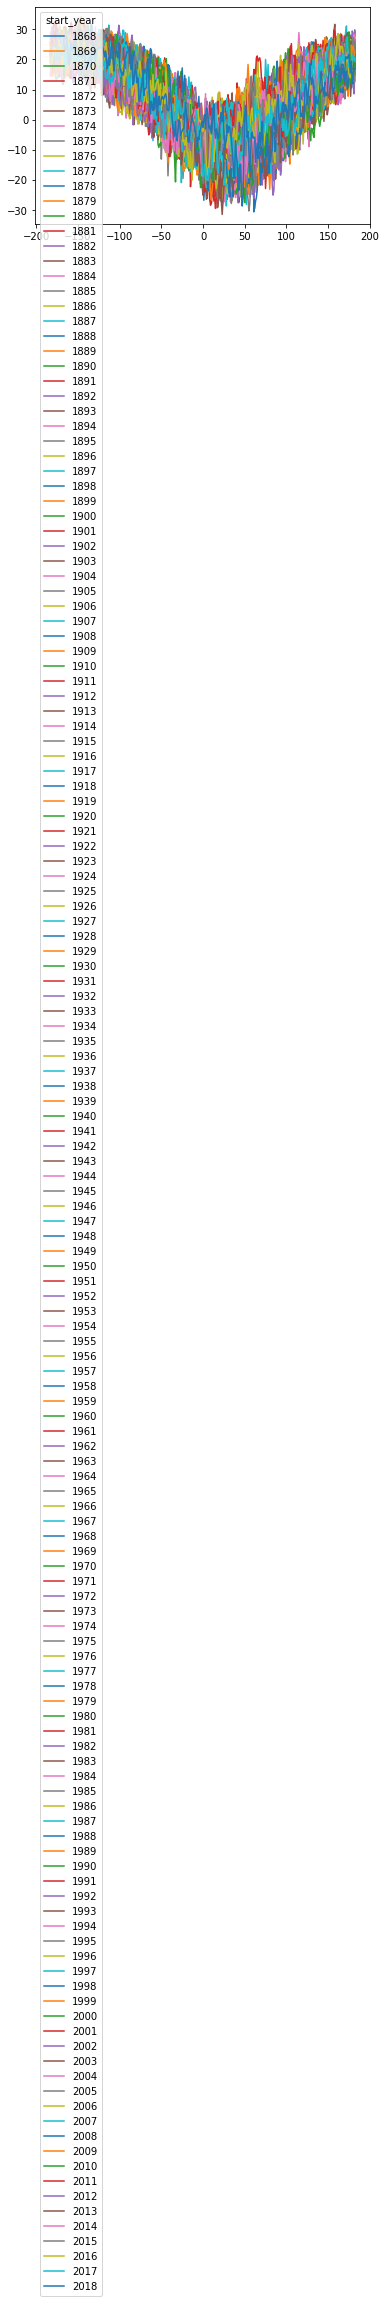

In [79]:
group.set_index('start_year').apply(lambda row: row.loc[-183:182].shift(-int(row.ice_on_doy)),axis=1).T.plot()
